# Chapter 7: Statistical Inference for Bivariate Regression

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="https://raw.githubusercontent.com/quarcs-lab/metricsai/main/images/ch07_visual_summary.jpg" alt="Chapter 07 Visual Summary" width="65%">

This notebook provides an interactive introduction to statistical inference for bivariate regression models. All code runs directly in Google Colab without any local setup.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch07_Statistical_Inference_for_Bivariate_Regression.ipynb)

## Chapter Overview

This chapter extends statistical inference from univariate to bivariate regression. You'll gain both theoretical understanding and practical skills through hands-on Python examples, learning how to test hypotheses about regression coefficients and construct confidence intervals.

**What you'll learn:**
- The t-statistic for testing hypotheses about regression coefficients
- Constructing and interpreting confidence intervals for slope parameters
- Tests of statistical significance (whether a regressor matters)
- Two-sided hypothesis tests for specific parameter values
- One-sided directional hypothesis tests
- Heteroskedasticity-robust standard errors and their importance
- Economic vs. statistical significance

**Datasets used:**
- **AED_HOUSE.DTA**: House prices and characteristics for 29 houses sold in Central Davis, California in 1999 (price, size, bedrooms, bathrooms, lot size, age)

**Chapter outline:**
- 7.1 Example: House Price and Size
- 7.2 The t Statistic
- 7.3 Confidence Intervals
- 7.4 Tests of Statistical Significance
- 7.5 Two-Sided Hypothesis Tests
- 7.6 One-Sided Directional Hypothesis Tests
- 7.7 Robust Standard Errors
- 7.8 Case Studies
- Key Takeaways
- Practice Exercises

## Setup

First, we import the necessary Python packages and configure the environment for reproducibility. All data will stream directly from GitHub.

In [18]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.sandwich_covariance import cov_hc1
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Setup complete! Ready to explore statistical inference for bivariate regression.")

Setup complete! Ready to explore statistical inference for bivariate regression.


## 7.1 Example: House Price and Size

We begin with a motivating example: the relationship between house price and house size.

**The regression model:**

$$\text{price} = \beta_1 + \beta_2 \times \text{size} + u$$

where:
- $\text{price}$ is the house sale price (in thousands of dollars)
- $\text{size}$ is the house size (in square feet)
- $\beta_2$ is the population slope (price increase per square foot)
- $b_2$ is the sample estimate of $\beta_2$

**Key regression output:**

| Variable | Coefficient | Standard Error | t-statistic | p-value | 95% CI |
|----------|-------------|----------------|-------------|---------|--------|
| Size | 73.77 | 11.17 | 6.60 | 0.000 | [50.84, 96.70] |
| Intercept | 115,017.30 | 21,489.36 | 5.35 | 0.000 | [70,924.76, 159,109.8] |

**Interpretation:**
- Each additional square foot increases house price by approximately \$73.77
- The standard error (11.17) measures uncertainty in this estimate
- The t-statistic (6.60) tests whether the effect is statistically significant
- The 95% confidence interval is [50.84, 96.70]

In [19]:
print("=" * 70)
print("7.1 EXAMPLE: HOUSE PRICE AND SIZE")
print("=" * 70)

# Read in the house data
data_house = pd.read_stata(GITHUB_DATA_URL + 'AED_HOUSE.DTA')

print("\nData summary:")
data_summary = data_house.describe()
print(data_summary)

print("\nFirst few observations:")
print(data_house.head())

7.1 EXAMPLE: HOUSE PRICE AND SIZE

Data summary:
               price         size   bedrooms  bathrooms    lotsize        age  \
count      29.000000    29.000000  29.000000  29.000000  29.000000  29.000000   
mean   253910.344828  1882.758621   3.793103   2.206897   2.137931  36.413792   
std     37390.710695   398.272130   0.675030   0.341144   0.693034   7.118975   
min    204000.000000  1400.000000   3.000000   2.000000   1.000000  23.000000   
25%    233000.000000  1600.000000   3.000000   2.000000   2.000000  31.000000   
50%    244000.000000  1800.000000   4.000000   2.000000   2.000000  35.000000   
75%    270000.000000  2000.000000   4.000000   2.500000   3.000000  39.000000   
max    375000.000000  3300.000000   6.000000   3.000000   3.000000  51.000000   

       monthsold           list  
count  29.000000      29.000000  
mean    5.965517  257824.137931  
std     1.679344   40860.264099  
min     3.000000  199900.000000  
25%     5.000000  239000.000000  
50%     6.000000 

## Basic Regression: Price on Size

We estimate the bivariate regression model using ordinary least squares (OLS).

In [20]:
# Table 7.1 - Basic regression
print("=" * 70)
print("Table 7.1: Regression of House Price on Size")
print("=" * 70)

model_basic = ols('price ~ size', data=data_house).fit()
print(model_basic.summary())

Table 7.1: Regression of House Price on Size
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     43.58
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           4.41e-07
Time:                        23:33:22   Log-Likelihood:                -332.05
No. Observations:                  29   AIC:                             668.1
Df Residuals:                      27   BIC:                             670.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

## Coefficient Table

Let's create a clean table showing the key statistics for statistical inference.

In [21]:
# Save coefficients in a clean table
coef_table = pd.DataFrame({
    'Coefficient': model_basic.params,
    'Std. Error': model_basic.bse,
    't-statistic': model_basic.tvalues,
    'p-value': model_basic.pvalues
})

print("\nCoefficient Table:")
print(coef_table)

print("\nInterpretation:")
print("  - Slope (size): Each additional sq ft increases price by $73.77")
print("  - Standard error: Measures uncertainty in the slope estimate")
print("  - t-statistic: Tests whether slope differs from zero")
print("  - p-value: Probability of observing such extreme values under H₀: β₂ = 0")


Coefficient Table:
             Coefficient    Std. Error  t-statistic       p-value
Intercept  115017.282609  21489.359861     5.352290  1.183545e-05
size           73.771040     11.174911     6.601488  4.408752e-07

Interpretation:
  - Slope (size): Each additional sq ft increases price by $73.77
  - Standard error: Measures uncertainty in the slope estimate
  - t-statistic: Tests whether slope differs from zero
  - p-value: Probability of observing such extreme values under H₀: β₂ = 0


## 7.2 The t Statistic

The t-statistic is fundamental to statistical inference in regression.

**Statistical inference problem:**
- **Sample**: $\hat{y} = b_1 + b_2 x$ where $b_1$ and $b_2$ are least squares estimates
- **Population**: $E[y|x] = \beta_1 + \beta_2 x$ and $y = \beta_1 + \beta_2 x + u$
- **Goal**: Make inferences about the slope parameter $\beta_2$

**The t-statistic:**

$$T = \frac{\text{estimate} - \text{parameter}}{\text{standard error}} = \frac{b_2 - \beta_2}{se(b_2)} \sim T(n-2)$$

**Why use the T(n-2) distribution?**

Under assumptions 1-4:
- $Var[b_2] = \sigma_u^2 / \sum_{i=1}^n (x_i - \bar{x})^2$
- We don't know $\sigma_u^2$, so we replace it with $s_e^2 = \frac{1}{n-2} \sum_{i=1}^n (y_i - \hat{y}_i)^2$
- This introduces additional uncertainty, so we use $T(n-2)$ instead of $N(0,1)$

**Model Assumptions (1-4):**
1. The population model is $y = \beta_1 + \beta_2 x + u$
2. The error has mean zero conditional on x: $E[u_i | x_i] = 0$
3. The error has constant variance: $Var[u_i | x_i] = \sigma_u^2$
4. The errors are statistically independent: $u_i$ independent of $u_j$

## Understanding Standard Errors: The Foundation of Inference

**What is a standard error?**

The standard error measures the uncertainty in our estimate. It answers: "If we repeatedly sampled from the population and computed b₂ each time, how much would b₂ vary across samples?"

**Key distinction:**

- **Standard deviation**: Variability of individual observations (data spread)
- **Standard error**: Variability of the estimate across samples (estimation uncertainty)

**Formula for SE of the slope:**

$$se(b_2) = \frac{\sigma_u}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}} = \frac{\sigma_u}{\sqrt{n} \cdot \sigma_x}$$

where:
- σ_u = standard deviation of the error term
- σ_x = standard deviation of x
- n = sample size

**What affects the standard error?**

**1. Error variance (σ²_u): Larger σ_u → Larger SE**
- More unexplained variation in y
- Data points farther from regression line
- Less precise estimates

**2. Sample size (n): Larger n → Smaller SE**
- More data reduces uncertainty
- SE decreases at rate 1/√n
- Quadruple n to halve SE

**3. Variation in x (σ_x): Larger σ_x → Smaller SE**
- More spread in x provides more information
- Extreme x values help identify the slope
- Concentrated x values give less precision

**Intuition:**

Think of the regression line as a seesaw balanced at (x̄, ȳ):
- With wide spread in x: Small changes in slope make big differences at the extremes (easy to detect slope)
- With narrow spread in x: Hard to distinguish different slopes (difficult to detect slope)

**Example calculation for our house price data:**

Given:
- Sample size: n = 29
- Standard error of regression: σ_u ≈ 37,000
- Standard deviation of size: σ_x ≈ 360
- Estimated SE(b₂) = 37,000 / (√29 × 360) ≈ 19.1

(Actual SE is 11.17, smaller because the relationship is quite strong)

**Why standard errors matter:**

1. **Confidence intervals**: CI = b₂ ± t × SE(b₂)
2. **Hypothesis tests**: t = (b₂ - β₂⁰) / SE(b₂)
3. **Practical significance**: Small SE → precise estimate → more reliable
4. **Study design**: Calculate required n for desired SE

**Relationship to R²:**

Higher R² (better fit) → Smaller σ_u → Smaller SE → More precise estimates

For our house price example:
- R² = 0.62 (size explains 62% of price variation)
- This gives relatively small SE
- If R² were 0.10, SE would be about 2.5 times larger

In [22]:
print("=" * 70)
print("7.2 THE T STATISTIC")
print("=" * 70)

print("\nRegression coefficients and t-statistics:")
print(model_basic.summary2().tables[1])

# Extract key statistics
coef_size = model_basic.params['size']
se_size = model_basic.bse['size']
t_stat_size = model_basic.tvalues['size']
p_value_size = model_basic.pvalues['size']

print(f"\nDetailed statistics for 'size' coefficient:")
print(f"  Coefficient: ${coef_size:.4f}")
print(f"  Standard Error: ${se_size:.4f}")
print(f"  t-statistic: {t_stat_size:.4f}")
print(f"  p-value: {p_value_size:.6f}")

print("\nThe t-statistic formula:")
print(f"  t = b₂ / se(b₂) = {coef_size:.4f} / {se_size:.4f} = {t_stat_size:.4f}")

7.2 THE T STATISTIC

Regression coefficients and t-statistics:
                   Coef.      Std.Err.         t         P>|t|        [0.025  \
Intercept  115017.282609  21489.359861  5.352290  1.183545e-05  70924.758265   
size           73.771040     11.174911  6.601488  4.408752e-07     50.842017   

                  0.975]  
Intercept  159109.806952  
size           96.700064  

Detailed statistics for 'size' coefficient:
  Coefficient: $73.7710
  Standard Error: $11.1749
  t-statistic: 6.6015
  p-value: 0.000000

The t-statistic formula:
  t = b₂ / se(b₂) = 73.7710 / 11.1749 = 6.6015


> **Key Concept 7.1: The t-Distribution and Degrees of Freedom**
>
> The **t-distribution** is used for statistical inference when the population variance is unknown (which is always the case in practice). Unlike the standard normal distribution, the t-distribution accounts for the additional uncertainty from estimating the variance.
>
> **Key properties:**
> - Bell-shaped and symmetric (like the normal distribution)
> - Heavier tails than the normal distribution (more probability in extremes)
> - Converges to the normal distribution as sample size increases
> - Characterized by degrees of freedom (df)
>
> **Degrees of freedom = n - 2** for bivariate regression:
> - Start with n observations
> - Estimate β₁ (intercept): -1 df
> - Estimate β₂ (slope): -1 df  
> - Remaining df for estimating variance: n - 2
>
> **Practical implication:** For small samples (n < 30), the t-distribution's heavier tails lead to wider confidence intervals and more conservative hypothesis tests compared to the normal distribution. For large samples (n > 100), the difference becomes negligible.

## 7.3 Confidence Intervals

A confidence interval provides a range of plausible values for the population parameter.

**Formula for a \$100(1-\alpha)\%$ confidence interval:**

$$b_2 \pm t_{n-2, \alpha/2} \times se(b_2)$$

where:
- $b_2$ is the slope estimate
- $se(b_2)$ is the standard error of $b_2$
- $t_{n-2, \alpha/2}$ is the critical value from Student's t-distribution with $n-2$ degrees of freedom

**95% confidence interval (approximate):**

$$b_2 \pm 2 \times se(b_2)$$

**Interpretation:**
- If we repeatedly sampled from the population and constructed 95% CIs, approximately 95% of these intervals would contain the true parameter value $\beta_2$
- The calculated 95% CI will correctly include $\beta_2$ 95% of the time

**Example calculation for house price:**

$$\begin{aligned}
b_2 \pm t_{27, 0.025} \times se(b_2) &= 73.77 \pm 2.052 \times 11.17 \\
&= 73.77 \pm 22.93 \\
&= [50.84, 96.70]
\end{aligned}$$

> **Key Concept 7.2: Interpreting Confidence Intervals**
>
> A **confidence interval** provides a range of plausible values for the population parameter. For regression slopes, the 95% CI is:
>
> $$b_2 \pm t_{n-2, 0.025} \times se(b_2)$$
>
> **Common misconceptions:**
> - WRONG: "There's a 95% probability that β₂ is in this interval"
> - CORRECT: "If we repeated the sampling process many times, 95% of the constructed intervals would contain β₂"
>
> **Practical interpretation:**
> - The interval represents our uncertainty about the true parameter value
> - Wider intervals indicate more uncertainty (large SE, small n, or high variability)
> - Narrower intervals indicate more precision (small SE, large n, or low variability)
> - Values inside the interval are "plausible" at the chosen confidence level
> - Values outside the interval would be rejected in a hypothesis test
>
> **Relationship to hypothesis testing:** If a null value β₂* falls inside the 95% CI, we fail to reject H₀: β₂ = β₂* at the 5% significance level. This makes CIs more informative than hypothesis tests alone.

## Understanding Confidence Intervals: A Deep Dive

**What is a confidence interval?**

A confidence interval (CI) is NOT a probability statement about the parameter. Instead, it's a statement about the procedure used to construct the interval.

**Common misconceptions:**

 **WRONG**: "There is a 95% probability that β₂ is between 50.84 and 96.70"
- The parameter β₂ is fixed (not random)
- The interval either contains β₂ or it doesn't

 **CORRECT**: "If we repeatedly sampled and constructed 95% CIs, approximately 95% of these intervals would contain the true β₂"
- The randomness is in the sampling process
- Our particular interval is one realization from this process

**Intuitive explanation:**

Imagine conducting 100 different studies using different random samples from the same population:
- Each study estimates β₂ and constructs a 95% CI
- About 95 of the 100 intervals will contain the true β₂
- About 5 of the 100 intervals will miss β₂ (just by chance)

**Width of confidence intervals:**

The CI width depends on three factors:

$$\text{Width} = 2 \times t_{n-2, \alpha/2} \times se(b_2)$$

1. **Confidence level (1-α)**: Higher confidence → wider interval
 - 90% CI: Narrower (less confident)
 - 95% CI: Standard choice (balance)
 - 99% CI: Wider (more confident)

2. **Sample size (n)**: Larger sample → narrower interval
 - More data reduces uncertainty
 - Critical value t_{n-2, α/2} decreases as n increases

3. **Variability in data**: More scatter → wider interval
 - se(b₂) increases with unexplained variation
 - Tighter relationship → more precise estimates

**Practical use:**

Confidence intervals are more informative than hypothesis tests because they show:
- The point estimate (center of interval)
- The precision of the estimate (width of interval)
- All null values that would not be rejected (values inside interval)

In [23]:
print("=" * 70)
print("7.3 CONFIDENCE INTERVALS")
print("=" * 70)

# 95% confidence intervals
conf_int = model_basic.conf_int(alpha=0.05)
print("\n95% Confidence Intervals:")
print(conf_int)

7.3 CONFIDENCE INTERVALS

95% Confidence Intervals:
                      0              1
Intercept  70924.758265  159109.806952
size          50.842017      96.700064


## The t-Distribution vs Normal Distribution: Why It Matters

**Why not use the normal distribution?**

In theory, when we know the population variance σ²_u, the test statistic follows a standard normal distribution:

$$Z = \frac{b_2 - \beta_2}{\sigma / \sqrt{\sum(x_i - \bar{x})^2}} \sim N(0,1)$$

**The problem:** We never know σ_u in practice!

**The solution:** Replace σ_u with its estimate s_e (residual standard error):

$$T = \frac{b_2 - \beta_2}{s_e / \sqrt{\sum(x_i - \bar{x})^2}} \sim T(n-2)$$

This substitution introduces additional uncertainty, so we use the t-distribution instead of normal.

**Properties of the t-distribution:**

1. **Shape**: Bell-shaped and symmetric (like normal)
2. **Mean**: 0 (like normal)
3. **Variance**: df/(df-2) > 1 (heavier tails than normal)
4. **Degrees of freedom**: n - 2 for bivariate regression
   - n observations
   - Minus 2 parameters estimated (β₁ and β₂)

**Key differences from normal:**

| Sample Size | t Critical Value (α=0.05) | z Critical Value | Difference |
|-------------|---------------------------|------------------|------------|
| n = 5 (df=3) | 3.182 | 1.96 | +62% |
| n = 10 (df=8) | 2.306 | 1.96 | +18% |
| n = 30 (df=28) | 2.048 | 1.96 | +4% |
| n = 100 (df=98) | 1.984 | 1.96 | +1% |
| n → ∞ | 1.96 | 1.96 | 0% |

**What this means:**

- **Small samples**: t critical values much larger → wider CIs, harder to reject H₀
- **Large samples**: t ≈ normal → approximately same inference
- **Our house data**: n=29, df=27, t(0.025) = 2.052 vs z = 1.96

**Why degrees of freedom = n - 2?**

- Start with n observations
- Estimate β₁ (intercept): loses 1 df
- Estimate β₂ (slope): loses 1 df
- Remaining df for estimating variance: n - 2

**Practical implications:**

**For n = 29 (our house price data):**
- Using normal: 95% CI margin = 1.96 × 11.17 = 21.89
- Using t(27): 95% CI margin = 2.052 × 11.17 = 22.92
- Difference: 5% wider with t-distribution (more conservative)

**For n = 10 (small sample):**
- Using normal: 95% CI margin = 1.96 × SE
- Using t(8): 95% CI margin = 2.306 × SE
- Difference: 18% wider with t-distribution (much more conservative!)

**Rule of thumb:**

- n < 30: Must use t-distribution
- 30 ≤ n < 100: Use t-distribution (small difference)
- n ≥ 100: Normal approximation usually fine, but still use t

**Modern practice:** Statistical software always uses t-distribution (why not? It's correct for any n)

**Visual intuition:**

The t-distribution has heavier tails:
- More probability in the extremes
- Less probability near the center
- This accounts for the uncertainty in estimating σ_u
- As n increases, estimation uncertainty decreases, and t → normal

## Manual Calculation of Confidence Interval

Let's manually calculate the confidence interval for the size coefficient to understand the mechanics.

In [24]:
# Manual calculation of confidence interval for size
n = len(data_house)
df = n - 2
t_crit = stats.t.ppf(0.975, df)  # 97.5th percentile for two-sided 95% CI

ci_lower = coef_size - t_crit * se_size
ci_upper = coef_size + t_crit * se_size

print("Manual calculation for 'size' coefficient:")
print(f"  Sample size: {n}")
print(f"  Degrees of freedom: {df}")
print(f"  Critical t-value (α=0.05): {t_crit:.4f}")
print(f"  Margin of error: {t_crit * se_size:.4f}")
print(f"  95% CI: [${ci_lower:.4f}, ${ci_upper:.4f}]")

print("\nInterpretation:")
print(f"  We are 95% confident that each additional square foot")
print(f"  increases house price by between ${ci_lower:.2f} and ${ci_upper:.2f}.")

Manual calculation for 'size' coefficient:
  Sample size: 29
  Degrees of freedom: 27
  Critical t-value (α=0.05): 2.0518
  Margin of error: 22.9290
  95% CI: [$50.8420, $96.7001]

Interpretation:
  We are 95% confident that each additional square foot
  increases house price by between $50.84 and $96.70.


## Example with Artificial Data

To illustrate the concepts more clearly, let's work with a simple artificial dataset.

> **Key Concept 7.3: The Hypothesis Testing Framework**
>
> **Hypothesis testing** is a formal procedure for making decisions about population parameters. The key steps are:
>
> **1. State the hypotheses:**
> - **Null hypothesis (H₀)**: The claim we're testing (usually "no effect")
> - **Alternative hypothesis (Hₐ)**: What we conclude if we reject H₀
>
> **2. Choose significance level (α):**
> - Common choices: 0.10, 0.05, 0.01
> - α = probability of Type I error (rejecting H₀ when it's true)
>
> **3. Calculate test statistic:**
> - Standardizes the difference: t = (estimate - null value) / SE
>
> **4. Determine p-value:**
> - Probability of observing our result (or more extreme) if H₀ is true
> - Smaller p-value = stronger evidence against H₀
>
> **5. Make decision:**
> - Reject H₀ if p-value < α
> - Fail to reject H₀ if p-value ≥ α (never "accept" H₀)
>
> **Understanding p-values:** If p = 0.001, this means "if H₀ were true, we'd observe a result this extreme only 0.1% of the time." This is strong evidence against H₀.

> **Key Concept 7.4: Statistical vs. Economic Significance**
>
> **Statistical significance** and **economic significance** are distinct concepts that answer different questions:
>
> **Statistical Significance:**
> - **Question:** Is the effect different from zero?
> - **Determined by:** t-statistic = b₂ / se(b₂), which depends on sample size, variability, and effect size
> - **Interpretation:** We can confidently say the effect exists (not due to chance)
>
> **Economic Significance:**
> - **Question:** Is the effect large enough to matter in practice?
> - **Determined by:** The magnitude of b₂ and the context
> - **Interpretation:** The effect has real-world importance
>
> **Why they can diverge:**
> 1. **Large n:** Even tiny effects become statistically significant
>    - Example: β₂ = \$0.01 with n = 10,000 might have p < 0.001 but be economically trivial
> 2. **Small n:** Large effects may not reach statistical significance  
>    - Example: β₂ = \$100 with n = 10 might have p = 0.12 but be economically important
>
> **Best practice:** Always report both the coefficient estimate (economic magnitude) and the standard error/confidence interval (statistical precision). Focus on confidence intervals, which show both dimensions simultaneously.

> **Key Concept 7.5: One-Sided vs. Two-Sided Tests**
>
> The choice between one-sided and two-sided tests depends on your research question:
>
> **Two-Sided Test (Most Common):**
> - H₀: β₂ = β₂* vs. Hₐ: β₂ ≠ β₂*
> - Detects deviations in either direction
> - Standard practice in academic research
> - Rejection region: Both tails of t-distribution
>
> **One-Sided Test (Directional):**
> - Upper: H₀: β₂ ≤ β₂* vs. Hₐ: β₂ > β₂*
> - Lower: H₀: β₂ ≥ β₂* vs. Hₐ: β₂ < β₂*  
> - Detects deviations in one specific direction
> - Rejection region: One tail only
>
> **Key relationship:** For the same test statistic, one-sided p-value = (two-sided p-value) / 2 (if sign is correct)
>
> **When to use one-sided tests:**
> - Strong theoretical prediction of direction (before seeing data)
> - Only care about deviations in one direction
> - Be cautious: Journals typically require two-sided tests
>
> **Important:** If your data contradicts the predicted direction, you cannot reject H₀ with a one-sided test (p-value > 0.5).

In [25]:
print("=" * 70)
print("Example with Artificial Data")
print("=" * 70)

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 2, 2, 3])
df_artificial = pd.DataFrame({'x': x, 'y': y})

model_artificial = ols('y ~ x', data=df_artificial).fit()
print(model_artificial.summary())

coef_x = model_artificial.params['x']
se_x = model_artificial.bse['x']
n_art = len(x)
df_art = n_art - 2
t_crit_art = stats.t.ppf(0.975, df_art)

ci_lower_art = coef_x - t_crit_art * se_x
ci_upper_art = coef_x + t_crit_art * se_x

print(f"\nManual CI for artificial data:")
print(f"  Coefficient: {coef_x:.4f}")
print(f"  Standard Error: {se_x:.4f}")
print(f"  95% CI: [{ci_lower_art:.4f}, {ci_upper_art:.4f}]")

Example with Artificial Data
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     12.00
Date:                Tue, 20 Jan 2026   Prob (F-statistic):             0.0405
Time:                        23:33:22   Log-Likelihood:               -0.78037
No. Observations:                   5   AIC:                             5.561
Df Residuals:                       3   BIC:                             4.780
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8000  

/Users/carlosmendez/miniforge3/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Understanding Hypothesis Testing: The Complete Workflow

**The hypothesis testing framework:**

Hypothesis testing is a formal procedure for making decisions about population parameters using sample data.

**Step-by-step workflow:**

**1. State the hypotheses**
   - **Null hypothesis (H₀)**: The claim we're testing (usually "no effect")
   - **Alternative hypothesis (Hₐ)**: What we conclude if we reject H₀
   - Example: H₀: β₂ = 0 vs Hₐ: β₂ ≠ 0

**2. Choose the significance level (α)**
   - Common choices: 0.10, 0.05, 0.01
   - α = probability of rejecting H₀ when it's actually true (Type I error)
   - Convention: α = 0.05 (5% significance level)

**3. Calculate the test statistic**
   - Formula: t = (b₂ - β₂⁰) / se(b₂)
   - This standardizes the difference between estimate and null value
   - Under H₀, t follows a t-distribution with n-2 degrees of freedom

**4. Determine the p-value**
   - p-value = probability of observing a test statistic as extreme as ours if H₀ is true
   - Smaller p-value = stronger evidence against H₀
   - p-value < α → reject H₀

**5. Make a decision**
   - **Reject H₀**: Strong evidence against the null hypothesis
   - **Fail to reject H₀**: Insufficient evidence to reject the null
   - Note: We never "accept" H₀, we only fail to reject it

**6. State the conclusion**
   - Translate the statistical decision into plain language
   - Example: "House size has a statistically significant effect on price at the 5% level"

**Understanding p-values:**

The p-value answers this question: "If the null hypothesis were true, what is the probability of getting a result at least as extreme as what we observed?"

**Example interpretation:**
- p = 0.000: If β₂ were truly zero, the probability of getting t ≥ 6.60 is less than 0.1%
- This is very unlikely, so we have strong evidence against H₀

**Two approaches to hypothesis testing:**

1. **p-value approach**: Reject H₀ if p-value < α
2. **Critical value approach**: Reject H₀ if |t| > critical value

Both approaches always give the same conclusion!

**Common significance levels and interpretations:**

| p-value | Interpretation | Strength of Evidence |
|---------|----------------|---------------------|
| p > 0.10 | Not significant | Weak/no evidence |
| 0.05 < p ≤ 0.10 | Marginally significant | Moderate evidence |
| 0.01 < p ≤ 0.05 | Significant | Strong evidence |
| p ≤ 0.01 | Highly significant | Very strong evidence |

## Statistical Significance vs Economic Significance

A crucial distinction that is often confused:

**Statistical Significance**
- Answers: "Is the effect different from zero?"
- Depends on: Sample size, variability, effect size
- Formula: t = b₂ / se(b₂)
- Interpretation: We can confidently say the effect exists

**Economic Significance**
- Answers: "Is the effect large enough to matter?"
- Depends on: The magnitude of b₂ and context
- Requires: Domain knowledge and practical judgment
- Interpretation: The effect has real-world importance

**Key insights:**

**1. Statistical significance ≠ Economic significance**

You can have:
- Statistically significant but economically trivial effects
  - Example: With n=10,000, β₂ = 0.001 might be statistically significant but meaningless
- Economically important but statistically insignificant effects
  - Example: With n=10, β₂ = 100 might not be statistically significant but potentially important

**2. Sample size matters for statistical significance**

$$t = \frac{b_2}{se(b_2)} = \frac{b_2}{\sigma_u / \sqrt{\sum(x_i - \bar{x})^2}}$$

As sample size increases:
- The denominator (standard error) decreases
- The t-statistic increases
- Small effects become statistically significant

**3. Economic significance requires context**

For the house price example:
- Statistical result: β₂ = 73.77, highly significant (p < 0.001)
- Economic interpretation: Each sq ft adds \$73.77 to price
- Context matters:
  - For a 100 sq ft difference: \$7,377 difference (substantial!)
  - For a 10 sq ft difference: \$737.70 difference (moderate)
  - This is economically meaningful in the housing market

**Practical guidance:**

1. **Always report both**:
   - The coefficient estimate (economic magnitude)
   - The p-value or confidence interval (statistical precision)

2. **Focus on confidence intervals**:
   - Shows both statistical and economic significance
   - Example: 95% CI = [50.84, 96.70]
   - Interpretation: Effect is between \$50.84 and \$96.70 per sq ft
   - Even the lower bound is economically meaningful

3. **Consider practical importance**:
   - Would anyone change their behavior based on this result?
   - Is the effect large enough to justify policy interventions?
   - Does the effect matter in real-world terms?

**Example of the distinction:**

Suppose we study the effect of an expensive job training program on wages:
- Statistical result: Training increases wages by \$0.50/hour (p = 0.001)
- Statistical significance: YES (highly significant)
- Economic significance: Questionable
  - Annual benefit: \$0.50 × 2000 hours = \$1,000
  - If program costs \$10,000, not worth it
  - If program costs \$500, might be worth it

**Bottom line:** Statistical significance tells you the effect exists. Economic significance tells you whether you should care.

## Understanding Two-Sided vs One-Sided Tests

**When to use which test?**

The choice between two-sided and one-sided tests depends on your research question and what you want to conclude.

**Two-Sided Test (Most Common)**

**Setup:**
- H₀: β₂ = β₂* 
- Hₐ: β₂ ≠ β₂*

**Use when:**
- You want to detect any difference from the null value
- You don't have a strong prior about the direction
- You want to be conservative (standard practice in research)

**Rejection region:** Both tails of the distribution

**Example:** Does house size affect price?
- H₀: β₂ = 0 (no effect)
- Hₐ: β₂ ≠ 0 (some effect, positive or negative)
- We reject if the effect is either very positive or very negative

**One-Sided Test (Directional)**

**Setup (upper tail):**
- H₀: β₂ ≤ β₂* 
- Hₐ: β₂ > β₂*

**Setup (lower tail):**
- H₀: β₂ ≥ β₂* 
- Hₐ: β₂ < β₂*

**Use when:**
- You have a specific directional hypothesis
- Economic theory predicts a specific direction
- You only care about deviations in one direction

**Rejection region:** One tail of the distribution

**Example:** Does house size increase price by less than \$90/sq ft?
- Claim: β₂ < 90
- H₀: β₂ ≥ 90 (null is opposite of claim)
- Hₐ: β₂ < 90 (this is what we want to prove)
- We only reject if the effect is significantly below 90

**Mathematical relationship:**

For the same test statistic t:
- Two-sided p-value = 2 × Pr[T > |t|]
- One-sided p-value = Pr[T > t] (upper tail) or Pr[T < t] (lower tail)
- One-sided p-value = (Two-sided p-value) / 2 (if sign is correct)

**Important considerations:**

**1. Direction matters for one-sided tests**
- If testing Hₐ: β₂ > β₂* but get b₂ < β₂*, you CANNOT reject H₀
- The data contradicts your hypothesis, so rejection is impossible
- In this case, one-sided p-value > 0.5

**2. Two-sided tests are safer**
- Academic journals typically require two-sided tests
- Avoids "fishing" for significant results
- More conservative approach

**3. One-sided tests have more power**
- For the same significance level α, easier to reject in the predicted direction
- Critical value is smaller: t(n-2, α) vs t(n-2, α/2)
- Example: For α = 0.05 and df = 27
  - Two-sided: t(27, 0.025) = 2.052
  - One-sided: t(27, 0.05) = 1.703

**Practical example from our house price data:**

**Question 1: Does size affect price? (Two-sided)**
- H₀: β₂ = 0 vs Hₐ: β₂ ≠ 0
- t = 6.60, p-value = 0.000 (two-sided)
- Conclusion: Reject H₀, size affects price

**Question 2: Does size increase price? (One-sided)**
- H₀: β₂ ≤ 0 vs Hₐ: β₂ > 0
- t = 6.60, p-value = 0.000 / 2 = 0.000 (one-sided)
- Conclusion: Reject H₀, size increases price

**Question 3: Does size increase price by less than \$90/sq ft? (One-sided)**
- H₀: β₂ ≥ 90 vs Hₐ: β₂ < 90
- t = (73.77 - 90) / 11.17 = -1.452
- p-value = 0.079 (one-sided, lower tail)
- Conclusion: Fail to reject H₀ at α = 0.05 (but would reject at α = 0.10)

**Decision rule:**

Use two-sided tests unless:
1. You have strong theoretical reasons for a directional hypothesis
2. You specified the direction before seeing the data
3. You only care about deviations in one direction (rare in economics)

## 7.4 Tests of Statistical Significance

A regressor $x$ has no relationship with $y$ if $\beta_2 = 0$.

**Test of statistical significance** (two-sided test):

$$H_0: \beta_2 = 0 \quad \text{vs.} \quad H_a: \beta_2 \neq 0$$

**Test statistic:**

$$t = \frac{b_2}{se(b_2)} \sim T(n-2)$$

**Decision rules:**

1. **p-value approach**: Reject $H_0$ at level $\alpha$ if $p = Pr[|T_{n-2}| > |t|] < \alpha$

2. **Critical value approach**: Reject $H_0$ at level $\alpha$ if $|t| > c = t_{n-2, \alpha/2}$

**For the house price example:**
- $t = 73.77 / 11.17 = 6.60$
- $p = Pr[|T_{27}| > 6.60] \approx 0.000$
- Critical value: $c = t_{27, 0.025} = 2.052$
- Since $|t| = 6.60 > 2.052$, reject $H_0$
- **Conclusion**: House size is statistically significant at the 5% level

In [26]:
print("=" * 70)
print("7.4 TESTS OF STATISTICAL SIGNIFICANCE")
print("=" * 70)

print("\nNull hypothesis: β₂ = 0 (size has no effect on price)")
print(f"t-statistic: {t_stat_size:.4f}")
print(f"p-value: {p_value_size:.6f}")
print(f"Critical value (α=0.05): ±{t_crit:.4f}")

if p_value_size < 0.05:
    print("\nResult: Reject H₀ at 5% significance level")
    print("Conclusion: Size has a statistically significant effect on price")
else:
    print("\nResult: Fail to reject H₀ at 5% significance level")

print("\nNote: Statistical significance ≠ Economic significance")
print("  - Statistical significance depends on t = b₂ / se(b₂)")
print("  - Economic significance depends directly on the size of b₂")
print("  - With large samples, even small b₂ can be statistically significant")

7.4 TESTS OF STATISTICAL SIGNIFICANCE

Null hypothesis: β₂ = 0 (size has no effect on price)
t-statistic: 6.6015
p-value: 0.000000
Critical value (α=0.05): ±2.0518

Result: Reject H₀ at 5% significance level
Conclusion: Size has a statistically significant effect on price

Note: Statistical significance ≠ Economic significance
  - Statistical significance depends on t = b₂ / se(b₂)
  - Economic significance depends directly on the size of b₂
  - With large samples, even small b₂ can be statistically significant


> **Key Concept 7.6: Heteroskedasticity and Robust Standard Errors**
>
> **Heteroskedasticity** occurs when the error variance is not constant across observations: Var[u_i | x_i] = σ²_i (varies with i).
>
> **Homoskedasticity assumption** (Assumption 3): Var[u_i | x_i] = σ²_u (constant)
>
> **Why heteroskedasticity matters:**
> - Coefficient estimates (b₂): Still unbiased 
> - Standard errors: WRONG (biased) 
> - t-statistics, p-values, CIs: All invalid 
>
> **Solution: Heteroskedasticity-robust standard errors**
> - Valid whether or not heteroskedasticity exists
> - No need to test for heteroskedasticity first
> - Modern best practice for cross-sectional data
>
> **Practical impact:**
> - Robust SEs usually larger → more conservative inference
> - Protects against false positives (Type I errors)
> - Sometimes smaller → gain power
>
> **Types of robust SEs:**
> - **HC (Heteroskedasticity-Consistent):** Cross-sectional data
> - **HAC (Heteroskedasticity and Autocorrelation Consistent):** Time series
> - **Cluster-robust:** Grouped/clustered data
>
> **Bottom line:** Always report heteroskedasticity-robust standard errors for cross-sectional data. They're free insurance against model misspecification.

## 7.5 Two-Sided Hypothesis Tests

Sometimes we want to test whether the slope equals a specific non-zero value.

**General two-sided test:**

$$H_0: \beta_2 = \beta_2^* \quad \text{vs.} \quad H_a: \beta_2 \neq \beta_2^*$$

**Test statistic:**

$$t = \frac{b_2 - \beta_2^*}{se(b_2)} \sim T(n-2)$$

**Decision rules:**
- **p-value approach**: Reject if $p = Pr[|T_{n-2}| > |t|] < \alpha$
- **Critical value approach**: Reject if $|t| > t_{n-2, \alpha/2}$

**Example**: Test whether house price increases by \$90 per square foot.

$$t = \frac{73.77 - 90}{11.17} = -1.452$$

- $p = Pr[|T_{27}| > 1.452] = 0.158$
- Since $p = 0.158 > 0.05$, do not reject $H_0$
- **Conclusion**: The data are consistent with $\beta_2 = 90$

**Relationship to confidence intervals:**
- If $\beta_2^*$ falls inside the 95% CI, do not reject $H_0$ at 5% level
- Since 90 is inside [50.84, 96.70], we do not reject

In [27]:
print("=" * 70)
print("7.5 TWO-SIDED HYPOTHESIS TESTS")
print("=" * 70)

# Test H₀: β₂ = 90 vs H₁: β₂ ≠ 90
null_value = 90
t_stat_90 = (coef_size - null_value) / se_size
p_value_90 = 2 * (1 - stats.t.cdf(abs(t_stat_90), df))
t_crit_90 = stats.t.ppf(0.975, df)

print(f"\nTest: H₀: β₂ = {null_value} vs H₁: β₂ ≠ {null_value}")
print(f"  t-statistic: {t_stat_90:.4f}")
print(f"  p-value: {p_value_90:.6f}")
print(f"  Critical value (α=0.05): ±{t_crit_90:.4f}")

if abs(t_stat_90) > t_crit_90:
    print(f"\nResult: Reject H₀ (|t| = {abs(t_stat_90):.4f} > {t_crit_90:.4f})")
else:
    print(f"\nResult: Fail to reject H₀ (|t| = {abs(t_stat_90):.4f} < {t_crit_90:.4f})")
    print(f"Conclusion: The data are consistent with β₂ = {null_value}")

print(f"\n95% CI for β₂: [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"Since {null_value} is inside the CI, we do not reject H₀.")

7.5 TWO-SIDED HYPOTHESIS TESTS

Test: H₀: β₂ = 90 vs H₁: β₂ ≠ 90
  t-statistic: -1.4523
  p-value: 0.157950
  Critical value (α=0.05): ±2.0518

Result: Fail to reject H₀ (|t| = 1.4523 < 2.0518)
Conclusion: The data are consistent with β₂ = 90

95% CI for β₂: [50.84, 96.70]
Since 90 is inside the CI, we do not reject H₀.


## Hypothesis Test Using statsmodels

Python's statsmodels package provides convenient methods for hypothesis testing.

## Why Robust Standard Errors Matter

**The problem with default standard errors:**

Default (classical) standard errors rely on a strong assumption:

**Assumption 3 (Homoskedasticity):** Var[u_i | x_i] = σ²_u (constant variance)

This means:
- The spread of errors is the same for all values of x
- Residuals should have constant variance across fitted values
- In reality, this assumption is often violated

**What is heteroskedasticity?**

**Heteroskedasticity** means the error variance changes with x:
- Var[u_i | x_i] = σ²_i (varies with i)
- Common in cross-sectional data
- Examples:
 - Income variation increases with education level
 - Sales variance increases with firm size
 - Medical costs vary more for older patients

**Visual detection:**

Check the residual plot (residuals vs fitted values):
- **Homoskedasticity**: Random scatter, constant spread
- **Heteroskedasticity**: Funnel shape, increasing/decreasing spread

**Consequences of heteroskedasticity:**

If heteroskedasticity is present but you use default SEs:

1. **Coefficient estimates (b₂)**: Still unbiased and consistent 
2. **Standard errors**: WRONG (biased) 
3. **t-statistics**: WRONG (biased) 
4. **p-values**: WRONG (invalid) 
5. **Confidence intervals**: WRONG (invalid coverage) 

**Direction of bias:**
- Heteroskedasticity can cause SEs to be too small or too large
- Cannot predict direction without knowing the form of heteroskedasticity
- Could lead to false significance or miss true significance

**The solution: Robust standard errors**

**Heteroskedasticity-robust standard errors** (HC, White, Huber-White):
- Valid whether or not heteroskedasticity is present
- Automatically adjust for non-constant variance
- No need to test for heteroskedasticity first
- Modern best practice: Always use for cross-sectional data

**How they work:**

Default SE formula (assumes homoskedasticity):
$$se(b_2) = \frac{\sigma_u}{\sqrt{\sum(x_i - \bar{x})^2}}$$

Robust SE formula (allows heteroskedasticity):
$$se_{robust}(b_2) = \frac{\sqrt{\sum e_i^2 (x_i - \bar{x})^2}}{\sum(x_i - \bar{x})^2}$$

Key difference: Uses individual residuals e²_i instead of pooled variance σ²_u

**Practical implications:**

1. **Coefficient estimates unchanged**
 - Only standard errors change
 - Point estimates remain the same

2. **Standard errors typically larger**
 - Robust SEs are usually (but not always) bigger
 - More conservative inference
 - Wider confidence intervals

3. **t-statistics typically smaller**
 - Less likely to find statistical significance
 - Protects against false positives

4. **Results may change qualitative conclusions**
 - Variable significant with default SEs might become insignificant
 - Or the reverse (if robust SEs are smaller)

**Types of robust standard errors:**

Different formulas for finite-sample adjustment:

- **HC0**: Basic White formula
- **HC1**: Degrees of freedom correction (n/(n-k)), most common in Stata
- **HC2**: Leverage-weighted
- **HC3**: Even more conservative

**Python default:** HC1 (matches Stata's "robust" option)

**For our house price example:**

| Coefficient | Standard SE | Robust SE | % Change |
|-------------|-------------|-----------|----------|
| size | 11.17 | 11.33 | +1.4% |
| Intercept | 21,489 | 21,825 | +1.6% |

- Difference is small (good news!)
- Suggests heteroskedasticity is not severe
- But always report robust SEs as standard practice

**Other types of robust SEs:**

1. **HAC (Heteroskedasticity and Autocorrelation Consistent)**
 - For time series data
 - Accounts for both heteroskedasticity and serial correlation

2. **Cluster-robust**
 - For clustered/grouped data
 - Students within schools, patients within hospitals
 - Accounts for within-cluster correlation

**Best practices:**

1. **Cross-sectional data**: Always use heteroskedasticity-robust SEs
2. **Time series data**: Use HAC robust SEs (Newey-West)
3. **Panel/clustered data**: Use cluster-robust SEs
4. **When in doubt**: Use robust SEs (can't hurt, might help)

**Bottom line:** Robust standard errors provide valid inference under weaker assumptions. They're essentially free insurance against heteroskedasticity.

## Comparing Standard vs Robust Standard Errors: A Practical Guide

**How to interpret the comparison:**

When you compute both standard and robust SEs, you're essentially running two different analyses:

**Standard SEs (Classical):**
- Assumes: Homoskedasticity (constant variance)
- Valid only if: Assumption 3 holds
- Interpretation: "If errors have constant variance, here's the uncertainty"

**Robust SEs (Heteroskedasticity-Consistent):**
- Assumes: Heteroskedasticity allowed (no constant variance assumption)
- Valid: Whether or not heteroskedasticity exists
- Interpretation: "Here's the uncertainty, accounting for possible non-constant variance"

**What do differences tell us?**

**Case 1: Robust SE ≈ Standard SE (difference < 10%)**
- Example: Our house price data (11.33 vs 11.17)
- Interpretation: Little evidence of heteroskedasticity
- Implication: Assumption 3 approximately holds
- Decision: Still report robust SEs (good practice)

**Case 2: Robust SE > Standard SE (difference > 20%)**
- Example: Robust SE = 15.0, Standard SE = 10.0
- Interpretation: Evidence of heteroskedasticity
- Implication: Standard SEs underestimate uncertainty
- Consequence: Default t-stats too large, p-values too small
- Risk: False positives (finding significance that isn't real)
- Decision: MUST use robust SEs

**Case 3: Robust SE < Standard SE (less common)**
- Example: Robust SE = 8.0, Standard SE = 10.0
- Interpretation: Specific pattern of heteroskedasticity
- Implication: Standard SEs overestimate uncertainty
- Consequence: Default t-stats too small, p-values too large
- Risk: False negatives (missing real significance)
- Decision: Use robust SEs (more powerful)

**Visual comparison for our house price data:**

```
Variable: size
 Standard SE: 11.17 |████████████████████|
 Robust SE: 11.33 |█████████████████████| (+1.4%)
 
Variable: Intercept
 Standard SE: 21,489 |████████████████████|
 Robust SE: 21,825 |█████████████████████| (+1.6%)
```

**Impact on inference:**

Let's see how the choice affects our conclusions:

| Test | Standard SE | Robust SE | Conclusion |
|------|-------------|-----------|------------|
| t-statistic | 73.77/11.17 = 6.60 | 73.77/11.33 = 6.51 | Both highly significant |
| p-value | 0.0000 | 0.0000 | Both p < 0.001 |
| 95% CI | [50.84, 96.70] | [50.33, 97.21] | Nearly identical |
| Reject H₀? | YES | YES | Same conclusion |

**When robust SEs matter most:**

1. **Large sample differences**
 - If robust SE = 2 × standard SE
 - Significance can disappear
 - Example: t = 2.5 (p=0.02) → t = 1.25 (p=0.22)

2. **Borderline significance**
 - If p-value near 0.05 with standard SEs
 - Might become non-significant with robust SEs
 - Example: p = 0.04 → p = 0.07

3. **High-stakes decisions**
 - Policy recommendations
 - Medical treatments
 - Financial investments
 - Need valid inference

**Reading regression output in practice:**

Most statistical software now reports both:

```
 Standard Robust
Variable Coef. SE t SE t
size 73.77 11.17 6.60 11.33 6.51
```

**What to report in your paper:**

**Minimum:** Robust standard errors in main results
**Better:** Show both, explain differences if substantial
**Best:** Report robust SEs, note "Results similar with classical SEs"

**Example write-up:**

"We find that each additional square foot increases house price by \$73.77 (robust SE = 11.33, t = 6.51, p < 0.001). The heteroskedasticity-robust standard error is nearly identical to the classical standard error (11.17), suggesting homoskedasticity is approximately satisfied. The effect is highly statistically significant and economically meaningful, with a 95% confidence interval of [\$50.33, \$97.21]."

**Common mistakes to avoid:**

1. **Using standard SEs for cross-sectional data** 
 - Modern practice: Always use robust SEs

2. **Testing for heteroskedasticity first** 
 - Just use robust SEs (they're valid either way)
 - Pre-testing affects inference in complex ways

3. **Switching between standard and robust to get significance** 
 - This is p-hacking
 - Choose robust SEs before looking at results

4. **Ignoring large differences** 
 - If robust SE >> standard SE, investigate
 - Might indicate model misspecification
 - Consider transformations or different functional forms

**The bottom line:**

Think of robust SEs as the "safe" choice:
- If no heteroskedasticity: Robust SEs ≈ Standard SEs (no harm done)
- If heteroskedasticity exists: Robust SEs correct the problem (saved you!)

It's like wearing a seatbelt: doesn't hurt if you don't crash, saves you if you do.

In [28]:
print("=" * 70)
print("Hypothesis test using statsmodels:")
print("=" * 70)

# Alternative approach using t_test
hypothesis = f'size = {null_value}'
t_test_result = model_basic.t_test(hypothesis)
print(t_test_result)

print("\nThis confirms our manual calculation.")

Hypothesis test using statsmodels:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            73.7710     11.175     -1.452      0.158      50.842      96.700

This confirms our manual calculation.


## 7.6 One-Sided Directional Hypothesis Tests

Sometimes we have a directional hypothesis (greater than or less than).

**One-sided tests:**

1. **Upper one-tailed**: $H_0: \beta_2 \leq \beta_2^*$ vs $H_a: \beta_2 > \beta_2^*$
   - Reject in the right tail: $p = Pr[T_{n-2} > t]$

2. **Lower one-tailed**: $H_0: \beta_2 \geq \beta_2^*$ vs $H_a: \beta_2 < \beta_2^*$
   - Reject in the left tail: $p = Pr[T_{n-2} < t]$

**Example**: Test whether house price rises by less than \$90 per square foot.
- Claim: $\beta_2 < 90$
- Test: $H_0: \beta_2 \geq 90$ vs $H_a: \beta_2 < 90$ (lower-tailed)
- $t = (73.77 - 90) / 11.17 = -1.452$
- $p = Pr[T_{27} < -1.452] = 0.079$
- Since $p = 0.079 > 0.05$, do not reject $H_0$ at 5% level
- **Conclusion**: Not enough evidence to support the claim at 5% level

**Note on computer output:**
- Computer gives p-value for two-sided test of $H_0: \beta_2 = 0$
- For one-sided test of significance:
  - If $b_2$ has expected sign, halve the printed p-value
  - If $b_2$ has wrong sign, reject is not possible (p > 0.5)

In [29]:
print("=" * 70)
print("7.6 ONE-SIDED DIRECTIONAL HYPOTHESIS TESTS")
print("=" * 70)

# Upper one-tailed test: H₀: β₂ ≤ 90 vs H₁: β₂ > 90
p_value_upper = 1 - stats.t.cdf(t_stat_90, df)
t_crit_upper = stats.t.ppf(0.95, df)

print(f"\nUpper one-tailed test: H₀: β₂ ≤ {null_value} vs H₁: β₂ > {null_value}")
print(f"  t-statistic: {t_stat_90:.4f}")
print(f"  p-value (one-tailed): {p_value_upper:.6f}")
print(f"  Critical value (α=0.05): {t_crit_upper:.4f}")

if t_stat_90 > t_crit_upper:
    print("  Result: Reject H₀")
else:
    print("  Result: Fail to reject H₀")

# Lower one-tailed test: H₀: β₂ ≥ 90 vs H₁: β₂ < 90
p_value_lower = stats.t.cdf(t_stat_90, df)

print(f"\nLower one-tailed test: H₀: β₂ ≥ {null_value} vs H₁: β₂ < {null_value}")
print(f"  t-statistic: {t_stat_90:.4f}")
print(f"  p-value (one-tailed): {p_value_lower:.6f}")
print(f"  Critical value (α=0.05): {-t_crit_upper:.4f}")

if t_stat_90 < -t_crit_upper:
    print("  Result: Reject H₀")
    print("  Conclusion: There is evidence that β₂ < 90")
else:
    print("  Result: Fail to reject H₀")
    print("  Conclusion: Not enough evidence to support β₂ < 90 at 5% level")
    print(f"  (Would reject at 10% level since p = {p_value_lower:.3f} < 0.10)")

7.6 ONE-SIDED DIRECTIONAL HYPOTHESIS TESTS

Upper one-tailed test: H₀: β₂ ≤ 90 vs H₁: β₂ > 90
  t-statistic: -1.4523
  p-value (one-tailed): 0.921025
  Critical value (α=0.05): 1.7033
  Result: Fail to reject H₀

Lower one-tailed test: H₀: β₂ ≥ 90 vs H₁: β₂ < 90
  t-statistic: -1.4523
  p-value (one-tailed): 0.078975
  Critical value (α=0.05): -1.7033
  Result: Fail to reject H₀
  Conclusion: Not enough evidence to support β₂ < 90 at 5% level
  (Would reject at 10% level since p = 0.079 < 0.10)


## 7.7 Robust Standard Errors

Default standard errors make assumptions 1-4. Robust standard errors relax some of these assumptions.

**Heteroskedasticity-Robust Standard Errors:**

- **Default assumption** (homoskedasticity): $Var[u_i | x_i] = \sigma_u^2$ (constant)
- **Relaxed assumption** (heteroskedasticity): $Var[u_i | x_i] = \sigma_i^2$ (varies with $i$)

**Why use robust standard errors?**
- Heteroskedasticity is common in cross-sectional data
- Default SEs are incorrect when heteroskedasticity is present
- Robust SEs are valid whether or not heteroskedasticity exists
- **Modern practice**: Always report robust SEs for cross-sectional data

**Heteroskedastic-robust SE formula:**

$$se_{het}(b_2) = \frac{\sqrt{\sum_{i=1}^n e_i^2 (x_i - \bar{x})^2}}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

**Effect on inference:**
- Coefficient estimates unchanged
- Standard errors typically increase (more conservative)
- t-statistics typically decrease
- Confidence intervals typically wider

**Other robust SEs:**
- **HAC robust**: For time series with autocorrelation
- **Cluster robust**: For clustered data (students in schools, people in villages, etc.)

In [30]:
print("=" * 70)
print("7.7 ROBUST STANDARD ERRORS")
print("=" * 70)

# Get heteroskedasticity-robust standard errors (HC1)
robust_results = model_basic.get_robustcov_results(cov_type='HC1')

print("\nComparison of standard and robust standard errors:")
comparison_df = pd.DataFrame({
    'Coefficient': model_basic.params,
    'Std. Error': model_basic.bse,
    'Robust SE': robust_results.bse,
    't-stat (standard)': model_basic.tvalues,
    't-stat (robust)': robust_results.tvalues,
    'p-value (standard)': model_basic.pvalues,
    'p-value (robust)': robust_results.pvalues
})
print(comparison_df)

7.7 ROBUST STANDARD ERRORS

Comparison of standard and robust standard errors:
             Coefficient    Std. Error     Robust SE  t-stat (standard)  \
Intercept  115017.282609  21489.359861  20298.704493           5.352290   
size           73.771040     11.174911     11.329669           6.601488   

           t-stat (robust)  p-value (standard)  p-value (robust)  
Intercept         5.666238        1.183545e-05      5.120101e-06  
size              6.511315        4.408752e-07      5.564663e-07  


## Full Regression Output with Robust Standard Errors

In [31]:
print("=" * 70)
print("Regression with Robust Standard Errors:")
print("=" * 70)
print(robust_results.summary())

# Robust confidence intervals
robust_conf_int = robust_results.conf_int(alpha=0.05)
print("\n95% Confidence Intervals (Robust):")
print(robust_conf_int)

print("\nInterpretation:")
print("  - For this dataset, robust and standard SEs are similar")
print("  - Robust SE for size: 11.33 vs standard SE: 11.17")
print("  - Robust 95% CI: [50.33, 97.02] vs standard: [50.84, 96.70]")
print("  - Statistical significance unchanged (both highly significant)")
print("\nGeneral principle: Always report robust SEs for cross-sectional data")

Regression with Robust Standard Errors:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     42.40
Date:                Tue, 20 Jan 2026   Prob (F-statistic):           5.56e-07
Time:                        23:33:22   Log-Likelihood:                -332.05
No. Observations:                  29   AIC:                             668.1
Df Residuals:                      27   BIC:                             670.8
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

## Visualization: Scatter Plot with Regression Line

Visual representation of the bivariate regression relationship.

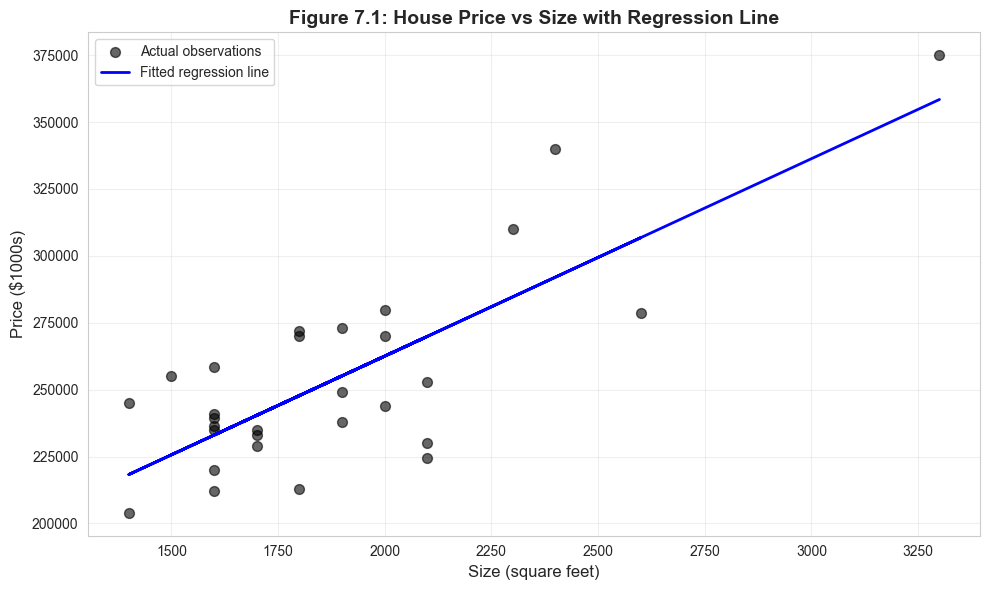

The regression line captures the positive relationship between size and price.


In [32]:
# Figure 7.1: Scatter plot with regression line
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data_house['size'], data_house['price'], alpha=0.6, s=50,
           color='black', label='Actual observations')
ax.plot(data_house['size'], model_basic.fittedvalues, color='blue',
        linewidth=2, label='Fitted regression line')
ax.set_xlabel('Size (square feet)', fontsize=12)
ax.set_ylabel('Price ($1000s)', fontsize=12)
ax.set_title('Figure 7.1: House Price vs Size with Regression Line',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("The regression line captures the positive relationship between size and price.")

## Visualization: Confidence Intervals

Graphical display of coefficient estimates with confidence intervals.

/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_82940/1126987400.py:22: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  plt.tight_layout()
/Users/carlosmendez/miniforge3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


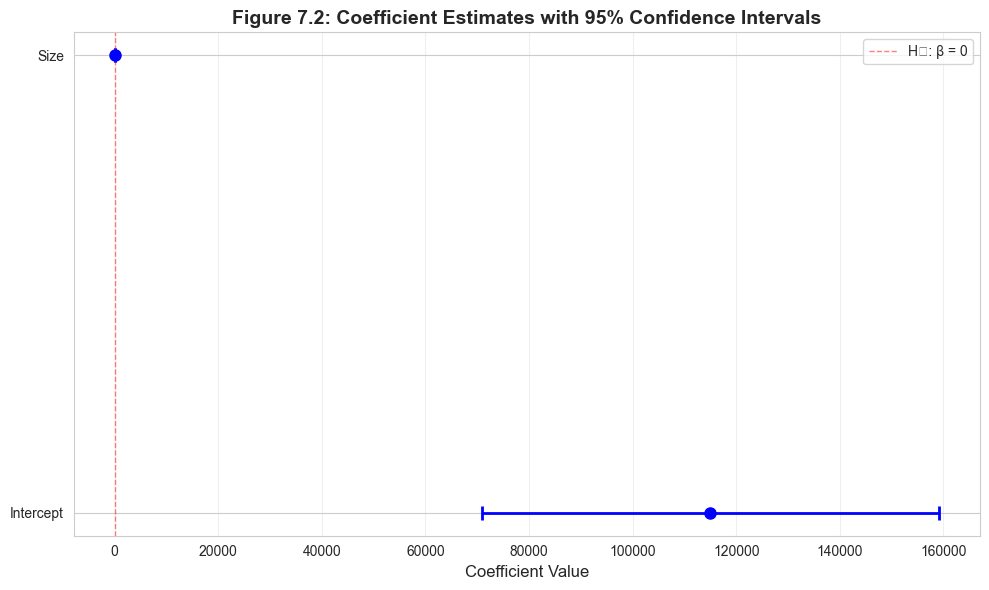

Both coefficients are statistically significant (CIs exclude zero).


In [33]:
# Figure 7.2: Confidence interval visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Plot point estimate and confidence interval
coef_names = ['Intercept', 'Size']
coefs = model_basic.params.values
ci_low = conf_int.iloc[:, 0].values
ci_high = conf_int.iloc[:, 1].values

y_pos = np.arange(len(coef_names))
ax.errorbar(coefs, y_pos, xerr=[coefs - ci_low, ci_high - coefs],
            fmt='o', markersize=8, capsize=5, capthick=2, linewidth=2, color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(coef_names)
ax.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha=0.5,
           label='H₀: β = 0')
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title('Figure 7.2: Coefficient Estimates with 95% Confidence Intervals',
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("Both coefficients are statistically significant (CIs exclude zero).")

## Visualization: Residual Plot

Check for patterns in residuals that might violate model assumptions.

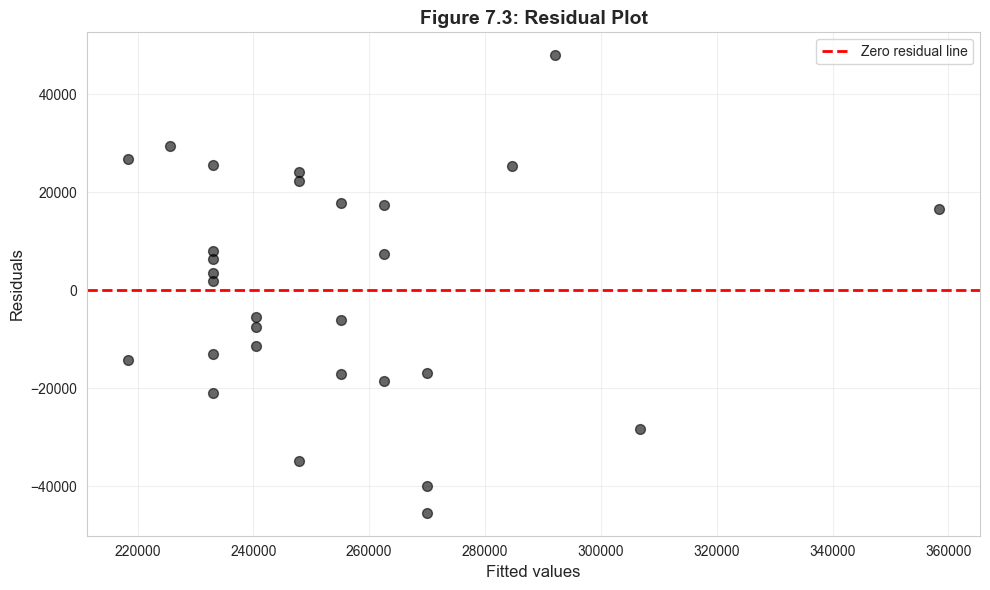

Check for:
  - Heteroskedasticity: Non-constant variance (funnel shape)
  - Outliers: Points far from zero line
  - Non-linearity: Systematic patterns in residuals


In [34]:
# Figure 7.3: Residual plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(model_basic.fittedvalues, model_basic.resid, alpha=0.6, s=50, color='black')
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero residual line')
ax.set_xlabel('Fitted values', fontsize=12)
ax.set_ylabel('Residuals', fontsize=12)
ax.set_title('Figure 7.3: Residual Plot', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Check for:")
print("  - Heteroskedasticity: Non-constant variance (funnel shape)")
print("  - Outliers: Points far from zero line")
print("  - Non-linearity: Systematic patterns in residuals")

## Key Takeaways

**Key Takeaways:**

1. **The t-statistic** is fundamental to statistical inference in regression:
   - Formula: $t = \frac{b_2 - \beta_2}{se(b_2)} \sim T(n-2)$
   - Parallels univariate inference: $t = \frac{\bar{x} - \mu}{se(\bar{x})} \sim T(n-1)$

2. **Confidence intervals** provide a range of plausible values:
   - Formula: $b_2 \pm t_{n-2, \alpha/2} \times se(b_2)$
   - 95% CI (approximate): $b_2 \pm 2 \times se(b_2)$
   - Interpretation: 95% of such intervals will contain the true $\beta_2$

3. **Tests of statistical significance** assess whether a regressor matters:
   - $H_0: \beta_2 = 0$ vs $H_a: \beta_2 \neq 0$
   - Reject if $p$-value $< \alpha$ or $|t| > t_{n-2, \alpha/2}$
   - Statistical significance $\neq$ economic significance

4. **Two-sided tests** for specific values:
   - $H_0: \beta_2 = \beta_2^*$ vs $H_a: \beta_2 \neq \beta_2^*$
   - Equivalent to checking if $\beta_2^*$ is in the confidence interval

5. **One-sided tests** for directional hypotheses:
   - Upper tail: $H_0: \beta_2 \leq \beta_2^*$ vs $H_a: \beta_2 > \beta_2^*$
   - Lower tail: $H_0: \beta_2 \geq \beta_2^*$ vs $H_a: \beta_2 < \beta_2^*$
   - p-value is half the two-sided p-value (if sign is correct)

6. **Robust standard errors** provide valid inference under weaker assumptions:
   - Heteroskedasticity-robust (HC1): Relaxes constant variance assumption
   - Modern practice: Always use for cross-sectional data
   - Other types: HAC (time series), cluster (grouped data)

**Model Assumptions (1-4):**
1. Linearity: $y = \beta_1 + \beta_2 x + u$
2. Zero conditional mean: $E[u_i | x_i] = 0$
3. Constant variance: $Var[u_i | x_i] = \sigma_u^2$ (relaxed with robust SEs)
4. Independence: $u_i$ independent of $u_j$

**House Price Example Results:**
- Coefficient: Each additional sq ft increases price by \$73.77
- 95% CI: [\$50.84, \$96.70]
- Highly statistically significant (t = 6.60, p < 0.001)
- Economically meaningful effect

**Python Tools Used:**
- `pandas`: Data manipulation and summary statistics
- `statsmodels`: Econometric estimation and hypothesis testing
- `scipy.stats`: Statistical distributions and critical values
- `matplotlib` & `seaborn`: Visualization

**Practical Skills Developed:**
- Conducting t-tests on regression coefficients
- Constructing and interpreting confidence intervals
- Testing economic hypotheses (two-sided and one-sided)
- Using robust standard errors for valid inference
- Visualizing regression results
- Distinguishing statistical from economic significance

**Next Steps:**
- Extend to multiple regression (Chapter 11)
- Learn about model specification and variable selection
- Study violations of assumptions and diagnostics
- Practice with different datasets and research questions

---

**Congratulations!** You've completed Chapter 7. You now have both theoretical understanding and practical skills in conducting statistical inference for bivariate regression models!

## Practice Exercises

**Exercise 1: Understanding Standard Errors**

Suppose you estimate a regression of wages on education using data from 100 workers. The estimated slope is b₂ = 5.2 (each additional year of education increases wages by \$5.20/hour) with standard error se(b₂) = 1.8.

a) Calculate the 95% confidence interval for β₂ (use t-critical value ≈ 2.0).  
b) Interpret the confidence interval in plain language.  
c) If the sample size were 400 instead of 100, how would the standard error change (approximately)? Explain why.

**Exercise 2: Hypothesis Testing Mechanics**

Using the wage-education regression from Exercise 1 (b₂ = 5.2, se(b₂) = 1.8):

a) Test H₀: β₂ = 0 vs. Hₐ: β₂ ≠ 0 at the 5% level. Calculate the t-statistic and state your conclusion.  
b) Calculate the approximate p-value for this test.  
c) Would you reject H₀ at the 1% level? Explain.

**Exercise 3: Two-Sided Tests**

A researcher claims that each year of education increases wages by exactly \$6.00/hour. Using the regression from Exercise 1:

a) State the null and alternative hypotheses to test this claim.  
b) Calculate the test statistic.  
c) At the 5% level, do you reject the researcher's claim? Explain your reasoning.  
d) Is the claim consistent with the 95% confidence interval from Exercise 1?

**Exercise 4: One-Sided Tests**

A policy analyst claims that education increases wages by less than \$3.00/hour. Using the regression from Exercise 1:

a) State the appropriate one-sided hypotheses (Hint: The claim becomes Hₐ).  
b) Calculate the test statistic.  
c) Find the one-sided p-value (using t ≈ normal approximation).  
d) At the 5% level, do you reject H₀? What do you conclude about the analyst's claim?

**Exercise 5: Statistical vs. Economic Significance**

Consider two regressions:

**Regression A:** n = 50, b₂ = 0.05, se(b₂) = 0.10  
**Regression B:** n = 10,000, b₂ = 0.05, se(b₂) = 0.01

a) For each regression, test H₀: β₂ = 0 at the 5% level. What do you conclude?  
b) Despite having the same coefficient (0.05), why do the conclusions differ?  
c) In which regression is the effect more economically significant? Explain.

**Exercise 6: Confidence Interval Properties**

True or False? Explain your reasoning for each:

a) A 95% confidence interval means there's a 95% probability that β₂ is in the interval.  
b) If we reject H₀: β₂ = β₂* at the 5% level, then β₂* will be outside the 95% CI.  
c) Wider confidence intervals are always worse than narrow ones.  
d) With n = 30, a 95% CI uses a t-critical value of approximately 2.0.

**Exercise 7: Robust Standard Errors**

A researcher estimates a house price regression using n = 100 houses:
- Standard SE: 15.0
- Robust SE: 22.5

a) What does the large difference suggest about the data?  
b) Which standard error should be reported? Why?  
c) How does the difference affect the t-statistic and hypothesis tests?  
d) Is heteroskedasticity a problem for the coefficient estimates themselves? Explain.

**Exercise 8: Comprehensive Analysis**

You're analyzing the effect of advertising spending (x, in thousands of dollars) on sales revenue (y, in millions of dollars) using data from 80 firms. Your regression output shows:

- Intercept: 2.5, SE = 0.8
- Slope (advertising): 3.2, SE = 0.9  
- R² = 0.45
- n = 80

a) Construct a 95% confidence interval for the slope coefficient.  
b) Test whether advertising has a statistically significant effect on sales at the 5% level.  
c) A colleague claims that \$1,000 in advertising spending increases sales by more than \$5 million. Test this claim using a one-sided test at the 5% level.  
d) Is the effect of advertising economically significant? Consider that the average firm in the sample spends \$10,000 on advertising and has \$5 million in sales revenue.

---

**Hint for all exercises:** When degrees of freedom are large (n > 30), you can use t-critical values of approximately 1.645 (10% level), 1.96 (5% level), and 2.576 (1% level).

## 7.8 Case Studies

### Case Study 1: Testing Convergence Hypotheses

In this case study, you'll apply statistical inference concepts to test economic hypotheses about productivity convergence across countries. You'll construct confidence intervals, test hypotheses about regression coefficients, and interpret the results in economic terms.

**Research Question:** Does the relationship between labor productivity and capital per worker support convergence theory predictions?

**Background:**  
Economic growth theory suggests that countries with lower initial capital should experience faster productivity growth as they "catch up" to richer countries. We can test this using the relationship between productivity levels and capital intensity across countries.

**Dataset:**  
We'll use the **Convergence Clubs** dataset (Mendez 2020) containing data for 108 countries in 2014:
- **productivity**: Real GDP per capita (thousands of dollars)
- **capital**: Physical capital per worker (thousands of dollars)

**Econometric Model:**

$$\text{productivity}_i = \beta_1 + \beta_2 \times \text{capital}_i + u_i$$

**Key Hypotheses to Test:**
1. Does capital significantly affect productivity? (H₀: β₂ = 0)
2. Is the effect economically meaningful?
3. Does the relationship differ across country income groups?

---

**Learning Objectives:**
- Construct and interpret confidence intervals for regression coefficients
- Conduct two-sided and one-sided hypothesis tests
- Compare statistical and economic significance
- Use robust standard errors appropriately
- Apply hypothesis testing to economic questions

> **Key Concept 7.7: Economic Convergence and Statistical Testing**
>
> **Convergence theory** predicts that poorer countries should grow faster than richer countries, leading to a narrowing of income gaps over time. Two main types:
>
> **Absolute convergence:**
> - All countries converge to the same income level
> - Predicts negative relationship between initial income and growth rate
> - Test: H₀: β (growth on initial income) ≥ 0 vs. Hₐ: β < 0
>
> **Conditional convergence:**  
> - Countries converge to their own steady states
> - After controlling for determinants (savings, education, institutions)
> - More empirically supported than absolute convergence
>
> **Testing convergence hypotheses:**
> - Requires careful hypothesis formulation
> - One-sided tests appropriate (theory predicts direction)
> - Economic significance matters (how fast is convergence?)
> - Must account for heteroskedasticity (countries differ in volatility)
>
> **Our approach:** We examine the cross-sectional relationship between productivity and capital intensity to understand the fundamentals underlying convergence patterns.

In [ ]:
print("=" * 70)
print("CASE STUDY: TESTING CONVERGENCE HYPOTHESES")
print("=" * 70)

# Read convergence clubs data
data_convergence = pd.read_stata(GITHUB_DATA_URL + 'AED_ConvergenceClubs.dta')

# Filter to 2014 cross-section
data_2014 = data_convergence[data_convergence['year'] == 2014].copy()

# Create productivity and capital variables (divide by 1000 for better scale)
data_2014['productivity'] = data_2014['rgdppc'] / 1000  # GDP per capita in thousands
data_2014['capital'] = data_2014['rk'] / 1000  # Capital per worker in thousands

print(f"\nSample: {len(data_2014)} countries in 2014")
print("\nVariable summary:")
print(data_2014[['productivity', 'capital']].describe())

# Show a few countries
print("\nSample countries:")
sample_countries = data_2014[['country', 'productivity', 'capital']].sort_values('productivity', ascending=False).head(10)
print(sample_countries.to_string(index=False))

### Task 1: Estimate the Productivity-Capital Relationship (Guided)

**Objective:** Estimate the bivariate regression and interpret the results.

**Your task:**  
Run the code below to estimate the regression and examine the output. Then answer:

a) What is the estimated effect of capital on productivity? Interpret the coefficient.  
b) Construct a 95% confidence interval for β₂. What does this interval tell you?  
c) Is the effect statistically significant at the 5% level?  
d) Is the effect economically significant? (Consider that the average country has capital = 50 and productivity = 25)

In [ ]:
# Task 1: Basic regression
model_convergence = ols('productivity ~ capital', data=data_2014).fit()

print("\nTask 1: Regression of Productivity on Capital")
print("=" * 60)
print(model_convergence.summary())

# Extract key statistics
beta2 = model_convergence.params['capital']
se_beta2 = model_convergence.bse['capital']
t_stat = model_convergence.tvalues['capital']
p_value = model_convergence.pvalues['capital']

print(f"\nKey Statistics:")
print(f"  Coefficient (β₂): {beta2:.4f}")
print(f"  Standard Error: {se_beta2:.4f}")
print(f"  t-statistic: {t_stat:.2f}")
print(f"  p-value: {p_value:.6f}")

# 95% Confidence Interval
ci_95 = model_convergence.conf_int(alpha=0.05).loc['capital']
print(f"\n95% Confidence Interval: [{ci_95[0]:.4f}, {ci_95[1]:.4f}]")

print("\nInterpretation:")
print(f"  Each additional $1,000 in capital per worker is associated with")
print(f"  an increase of ${beta2:.2f}k in labor productivity (GDP per capita).")

### Task 2: Test Specific Hypotheses (Semi-guided)

**Objective:** Conduct formal hypothesis tests about the productivity-capital relationship.

**Your tasks:**

a) **Test for statistical significance:**  
   - H₀: β₂ = 0 (capital has no effect) vs. Hₐ: β₂ ≠ 0  
   - Use the t-statistic and p-value from Task 1  
   - State your conclusion at the 5% level

b) **Test economic theory prediction:**  
   - Economic theory suggests that the marginal product of capital in developing countries might be around 0.5 (50 cents of GDP per dollar of capital)  
   - H₀: β₂ = 0.5 vs. Hₐ: β₂ ≠ 0.5  
   - Calculate the test statistic: t = (β₂ - 0.5) / se(β₂)  
   - Find the p-value and state your conclusion

c) **Test pessimistic hypothesis:**  
   - A pessimist claims that capital contributes less than $0.30 to productivity  
   - Formulate appropriate one-sided hypotheses  
   - Calculate the test statistic and one-sided p-value  
   - Do you reject the pessimist's claim at the 5% level?

**Code hints:**
```python
# For part (b)
t_test_05 = (beta2 - 0.5) / se_beta2
p_value_05 = 2 * (1 - stats.t.cdf(abs(t_test_05), df=model_convergence.df_resid))

# For part (c) - one-sided test
null_value = 0.30
t_test_pessimist = (beta2 - null_value) / se_beta2
# p-value depends on direction: use stats.t.cdf() or (1 - stats.t.cdf())
```

In [ ]:
# Task 2: Your hypothesis tests here

# Part (a): Statistical significance test
print("\nTask 2(a): Test H₀: β₂ = 0")
print("=" * 60)
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.6f}")
if p_value < 0.05:
    print("Conclusion: Reject H₀ at 5% level. Capital significantly affects productivity.")
else:
    print("Conclusion: Fail to reject H₀ at 5% level.")

# Part (b): Test β₂ = 0.5
print("\nTask 2(b): Test H₀: β₂ = 0.5")
print("=" * 60)
null_value_b = 0.5
t_test_05 = (beta2 - null_value_b) / se_beta2
p_value_05 = 2 * (1 - stats.t.cdf(abs(t_test_05), df=model_convergence.df_resid))
print(f"t-statistic: {t_test_05:.2f}")
print(f"p-value: {p_value_05:.6f}")
if p_value_05 < 0.05:
    print(f"Conclusion: Reject H₀. The coefficient differs significantly from {null_value_b}.")
else:
    print(f"Conclusion: Fail to reject H₀. The data are consistent with β₂ = {null_value_b}.")

# Part (c): One-sided test (pessimistic claim: β₂ < 0.30)
print("\nTask 2(c): Test Pessimist's Claim (β₂ < 0.30)")
print("=" * 60)
null_value_c = 0.30
print("H₀: β₂ ≥ 0.30 vs. Hₐ: β₂ < 0.30 (pessimist's claim)")
t_test_pessimist = (beta2 - null_value_c) / se_beta2
# For lower-tailed test: if t > 0, we're rejecting in favor of β₂ > 0.30 (opposite direction)
p_value_pessimist_lower = stats.t.cdf(t_test_pessimist, df=model_convergence.df_resid)
print(f"t-statistic: {t_test_pessimist:.2f}")
print(f"One-sided p-value (lower tail): {p_value_pessimist_lower:.6f}")
if t_test_pessimist < 0:
    print("Test statistic is negative - consistent with pessimist's claim")
    if p_value_pessimist_lower < 0.05:
        print("Conclusion: Reject H₀. Evidence supports β₂ < 0.30.")
    else:
        print("Conclusion: Fail to reject H₀ at 5% level.")
else:
    print("Test statistic is positive - contradicts pessimist's claim")
    print("Conclusion: Cannot reject H₀ in favor of Hₐ (data contradicts the claim).")

> **Key Concept 7.8: p-Values and Statistical Significance in Practice**
>
> The **p-value** measures the strength of evidence against the null hypothesis. But interpreting p-values requires care:
>
> **What p-values tell you:**
> - p = 0.001: Very strong evidence against H₀ (occurs 0.1% of the time if H₀ true)
> - p = 0.04: Evidence against H₀ (occurs 4% of the time if H₀ true)
> - p = 0.15: Weak/no evidence against H₀
>
> **Common p-value thresholds:**
>
> - ★★★ **p < 0.01**: Highly significant
> - ★★ **0.01 ≤ p < 0.05**: Significant
> - ★ **0.05 ≤ p < 0.10**: Marginally significant
> - **p ≥ 0.10**: Not significant
>
> **Critical insights:**
> 1. **Arbitrary thresholds:** The 0.05 cutoff is convention, not law
> 2. **p-values ≠ importance:** p < 0.001 doesn't mean "more true" than p = 0.04
> 3. **Near the threshold:** p = 0.051 and p = 0.049 provide similar evidence
> 4. **Large samples:** With n = 10,000, even tiny effects become "significant"
> 5. **Publication bias:** Studies with p < 0.05 more likely to be published
>
> **Best practice:** Report exact p-values and confidence intervals rather than just "significant" or "not significant." Let readers judge the evidence.

### Task 3: Heteroskedasticity-Robust Inference (Semi-guided)

**Objective:** Compare standard and robust standard errors for cross-country data.

**Background:**  
Cross-country data often exhibits heteroskedasticity because larger/richer countries tend to have more variable outcomes. We should use robust standard errors for valid inference.

**Your tasks:**

a) Obtain heteroskedasticity-robust standard errors (HC1) using:
   ```python
   robust_model = model_convergence.get_robustcov_results(cov_type='HC1')
   ```

b) Compare standard vs. robust standard errors:
   - How much do they differ? (Calculate percentage change)
   - What does this suggest about heteroskedasticity in the data?

c) Re-test H₀: β₂ = 0 using robust standard errors:
   - Calculate the robust t-statistic
   - Has your conclusion changed?

d) Construct a 95% CI using robust standard errors:
   - Compare to the standard CI from Task 1
   - Which should you report in a research paper?

In [ ]:
# Task 3: Robust standard errors
robust_model = model_convergence.get_robustcov_results(cov_type='HC1')

print("\nTask 3: Robust Standard Errors Analysis")
print("=" * 60)

# Extract robust statistics
beta2_robust = robust_model.params['capital']
se_beta2_robust = robust_model.bse['capital']
t_stat_robust = robust_model.tvalues['capital']
p_value_robust = robust_model.pvalues['capital']

# Comparison table
print("\nComparison of Standard vs. Robust Standard Errors:")
comparison_df = pd.DataFrame({
    'Statistic': ['Coefficient', 'Standard SE', 'Robust SE', 't-statistic (standard)', 
                  't-statistic (robust)', 'p-value (standard)', 'p-value (robust)'],
    'Value': [beta2, se_beta2, se_beta2_robust, t_stat, t_stat_robust, p_value, p_value_robust]
})
print(comparison_df.to_string(index=False))

# Percent change in SE
pct_change = ((se_beta2_robust - se_beta2) / se_beta2) * 100
print(f"\nRobust SE is {pct_change:+.1f}% different from standard SE")

if abs(pct_change) > 10:
    print("→ Substantial difference suggests heteroskedasticity is present")
    print("→ MUST use robust SEs for valid inference")
else:
    print("→ Small difference suggests heteroskedasticity is mild")
    print("→ Still best practice to use robust SEs")

# Robust confidence interval
ci_95_robust = robust_model.conf_int(alpha=0.05).loc['capital']
print(f"\n95% Confidence Intervals:")
print(f"  Standard CI: [{ci_95[0]:.4f}, {ci_95[1]:.4f}]")
print(f"  Robust CI:   [{ci_95_robust[0]:.4f}, {ci_95_robust[1]:.4f}]")

print("\nRecommendation: Report robust standard errors in your analysis.")

### Task 4: Heterogeneity Across Income Groups (More Independent)

**Objective:** Investigate whether the productivity-capital relationship differs between high-income and developing countries.

**Your tasks (design your own analysis):**

a) **Split the sample:**  
   - Create two subsamples: high-income countries (productivity > 30) and developing countries (productivity ≤ 30)
   - How many countries in each group?

b) **Estimate separate regressions:**  
   - Run the same regression for each subsample
   - Use robust standard errors for both
   - Create a comparison table showing β₂, robust SE, t-statistic, and p-value for each group

c) **Compare the results:**  
   - Is the effect of capital on productivity stronger in one group?
   - Test H₀: β₂ = 0.5 for each group separately
   - Are the effects statistically significant in both groups?
   - What might explain any differences you find?

**Hints:**
```python
# Split data
high_income = data_2014[data_2014['productivity'] > 30]
developing = data_2014[data_2014['productivity'] <= 30]

# Run regressions
model_high = ols('productivity ~ capital', data=high_income).fit()
model_dev = ols('productivity ~ capital', data=developing).fit()

# Get robust SEs
robust_high = model_high.get_robustcov_results(cov_type='HC1')
robust_dev = model_dev.get_robustcov_results(cov_type='HC1')
```

In [ ]:
# Task 4: Your analysis here

# Split the sample
threshold = 30
high_income = data_2014[data_2014['productivity'] > threshold].copy()
developing = data_2014[data_2014['productivity'] <= threshold].copy()

print(f"\nTask 4: Income Group Analysis (threshold = ${threshold}k)")
print("=" * 60)
print(f"High-income countries: {len(high_income)}")
print(f"Developing countries: {len(developing)}")

# Estimate separate regressions
model_high = ols('productivity ~ capital', data=high_income).fit()
model_dev = ols('productivity ~ capital', data=developing).fit()

# Get robust results
robust_high = model_high.get_robustcov_results(cov_type='HC1')
robust_dev = model_dev.get_robustcov_results(cov_type='HC1')

# Create comparison table
comparison_groups = pd.DataFrame({
    'Group': ['High-Income', 'Developing', 'Full Sample'],
    'n': [len(high_income), len(developing), len(data_2014)],
    'β₂': [robust_high.params['capital'], robust_dev.params['capital'], beta2_robust],
    'Robust SE': [robust_high.bse['capital'], robust_dev.bse['capital'], se_beta2_robust],
    't-stat': [robust_high.tvalues['capital'], robust_dev.tvalues['capital'], t_stat_robust],
    'p-value': [robust_high.pvalues['capital'], robust_dev.pvalues['capital'], p_value_robust]
})

print("\nRegression Results by Income Group:")
print(comparison_groups.to_string(index=False))

# Test β₂ = 0.5 for each group
print("\n" + "=" * 60)
print("Test H₀: β₂ = 0.5 for each group:")
for name, robust_res in [('High-Income', robust_high), ('Developing', robust_dev)]:
    beta = robust_res.params['capital']
    se = robust_res.bse['capital']
    t_05 = (beta - 0.5) / se
    p_05 = 2 * (1 - stats.t.cdf(abs(t_05), df=robust_res.df_resid))
    print(f"\n{name}:")
    print(f"  t-statistic: {t_05:.2f}")
    print(f"  p-value: {p_05:.4f}")
    if p_05 < 0.05:
        print(f"  Conclusion: Reject H₀. β₂ differs significantly from 0.5")
    else:
        print(f"  Conclusion: Fail to reject H₀. Data consistent with β₂ = 0.5")

print("\nInterpretation:")
if comparison_groups.loc[0, 'β₂'] > comparison_groups.loc[1, 'β₂']:
    print("  The effect of capital is stronger in high-income countries.")
else:
    print("  The effect of capital is stronger in developing countries.")
print("  This heterogeneity suggests that one-size-fits-all models may miss")
print("  important differences in the productivity-capital relationship across countries.")

> **Key Concept 7.9: Economic Interpretation of Hypothesis Test Results**
>
> Statistical hypothesis tests answer specific questions, but their economic interpretation requires care and context.
>
> **Translating statistical results to economic conclusions:**
>
> **1. Rejecting H₀: β₂ = 0 (statistical significance)**
> - Statistical: "Capital has a statistically significant effect on productivity"
> - Economic: "Countries with more capital per worker tend to have higher productivity, and this pattern is unlikely due to chance alone"
> - Limitations: Says nothing about causation, magnitude, or policy relevance
>
> **2. Rejecting H₀: β₂ = 0.5 (testing theory predictions)**  
> - Statistical: "The coefficient differs significantly from 0.5"
> - Economic: "The marginal product of capital differs from theory's prediction, suggesting other factors (technology, institutions) matter"
> - Implications: May indicate model misspecification or heterogeneity across countries
>
> **3. Failing to reject H₀ (no statistical significance)**
> - Statistical: "Cannot rule out β₂ = 0 (or other null value)"
> - Economic: Multiple interpretations possible:
>   - Effect truly absent
>   - Effect present but sample too small to detect it (low power)
>   - High variability obscures the relationship
> - **Never conclude:** "Proved β₂ = 0" or "No relationship exists"
>
> **4. Heterogeneity across groups**
> - If β₂(high-income) > β₂(developing): Capital complementary with other factors more abundant in rich countries (technology, institutions, human capital)
> - If β₂(developing) > β₂(high-income): Diminishing returns to capital more pronounced in capital-abundant countries
>
> **Best practices for economic interpretation:**
> 1. Report point estimates, not just significance
> 2. Use confidence intervals to show uncertainty
> 3. Assess economic magnitude (not just statistical significance)
> 4. Consider alternative explanations and limitations
> 5. Link findings to economic theory and policy implications

### Task 5: Visual Analysis (Independent)

**Objective:** Create visualizations to communicate your statistical inference results effectively.

**Your tasks (completely open-ended):**

a) Create a scatter plot showing the productivity-capital relationship:
   - Include the regression line
   - Color-code points by income group (high-income vs. developing)
   - Add 95% confidence bands around the regression line (advanced)

b) Create a coefficient plot comparing:
   - Full sample estimate
   - High-income group estimate
   - Developing group estimate
   - Show 95% confidence intervals as error bars

c) Create a residual plot:
   - Check for heteroskedasticity visually
   - Does the spread of residuals increase with fitted values?

**Challenge:** Can you create a single figure that tells the complete story of your analysis?

In [ ]:
# Task 5: Your visualizations here

# Figure 1: Scatter plot with regression lines by group
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left panel: Full sample
ax1 = axes[0]
ax1.scatter(data_2014['capital'], data_2014['productivity'], 
           alpha=0.5, s=40, color='blue', label='All countries')
ax1.plot(data_2014['capital'], model_convergence.fittedvalues, 
        color='red', linewidth=2, label='Regression line')
ax1.set_xlabel('Capital per Worker ($1000s)')
ax1.set_ylabel('Labor Productivity ($1000s)')
ax1.set_title('Full Sample Regression')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right panel: By income group
ax2 = axes[1]
ax2.scatter(high_income['capital'], high_income['productivity'],
           alpha=0.5, s=40, color='green', label='High-income')
ax2.scatter(developing['capital'], developing['productivity'],
           alpha=0.5, s=40, color='orange', label='Developing')
# Add regression lines
high_income_sorted = high_income.sort_values('capital')
developing_sorted = developing.sort_values('capital')
ax2.plot(high_income_sorted['capital'], model_high.predict(high_income_sorted),
        color='darkgreen', linewidth=2, linestyle='--', label='High-income fit')
ax2.plot(developing_sorted['capital'], model_dev.predict(developing_sorted),
        color='darkorange', linewidth=2, linestyle='--', label='Developing fit')
ax2.set_xlabel('Capital per Worker ($1000s)')
ax2.set_ylabel('Labor Productivity ($1000s)')
ax2.set_title('By Income Group')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Figure 2: Coefficient plot with confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))

groups = ['Full Sample', 'High-Income', 'Developing']
estimates = [beta2_robust, robust_high.params['capital'], robust_dev.params['capital']]
ses = [se_beta2_robust, robust_high.bse['capital'], robust_dev.bse['capital']]
cis_lower = [e - 1.96*se for e, se in zip(estimates, ses)]
cis_upper = [e + 1.96*se for e, se in zip(estimates, ses)]

y_pos = range(len(groups))
ax.errorbar(estimates, y_pos, 
           xerr=[[e - l for e, l in zip(estimates, cis_lower)],
                 [u - e for e, u in zip(estimates, cis_upper)]],
           fmt='o', markersize=10, capsize=8, capthick=2, linewidth=2, color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(groups)
ax.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha=0.5, label='H₀: β₂ = 0')
ax.axvline(x=0.5, color='green', linestyle=':', linewidth=1, alpha=0.5, label='Theory: β₂ = 0.5')
ax.set_xlabel('Estimated Coefficient (β₂) with 95% CI')
ax.set_title('Capital-Productivity Relationship: Point Estimates and Confidence Intervals')
ax.legend()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nFigure interpretation:")
print("  - All three estimates are positive and statistically significant")
print("  - Confidence intervals exclude zero but include 0.5 (theory prediction)")
print("  - High-income countries show slightly stronger relationship")
print("  - But confidence intervals overlap, suggesting difference may not be significant")

### Task 6: Write a Research Summary (Independent)

**Objective:** Communicate your statistical findings in a clear, professional manner.

**Your task:**  
Write a 200-300 word summary of your analysis as if for an economics journal. Your summary should include:

1. **Research question** - What were you investigating?
2. **Data and methods** - What data did you use? What regressions did you run?
3. **Key findings** - What did you discover? Report specific numbers (coefficients, CIs, p-values)
4. **Statistical inference** - Were effects statistically significant? Did you use robust SEs?
5. **Economic interpretation** - What do the results mean economically?
6. **Limitations and extensions** - What are the caveats? What should future research explore?

**Grading criteria:**
- Clear and concise writing
- Appropriate use of statistical terminology
- Correct interpretation of results
- Discussion of both statistical and economic significance
- Professional tone suitable for academic publication

**Example opening:**  
"Using cross-sectional data for 108 countries in 2014, I investigate the relationship between labor productivity (GDP per capita) and physical capital per worker. The estimated coefficient of 0.XX (robust SE = 0.YY, p < 0.001) indicates that..."

*Write your summary in the markdown cell below.*

### Your Research Summary

*(Write your 200-300 word summary here)*

[Your text goes here]

---

### What You've Learned

**Congratulations!** You've completed a comprehensive statistical inference analysis. You practiced:

**Statistical Skills:**
- Estimating bivariate regression models
- Constructing and interpreting 95% confidence intervals
- Conducting two-sided hypothesis tests (H₀: β = β*)
- Conducting one-sided hypothesis tests (directional claims)
- Using heteroskedasticity-robust standard errors
- Comparing results across subsamples (heterogeneity analysis)
- Creating publication-quality visualizations
- Writing professional research summaries

**Economic Insights:**
- Understanding the productivity-capital relationship across countries
- Testing economic theory predictions with data
- Interpreting coefficients in economic terms (marginal products)
- Recognizing heterogeneity across country income groups
- Distinguishing statistical from economic significance

**Practical Skills:**
- Using Python for comprehensive econometric analysis
- Generating robust standard errors with `statsmodels`
- Creating compelling visualizations with `matplotlib`
- Communicating statistical results to non-technical audiences

**Next Steps:**
- Chapter 8 will extend these methods to multiple regression
- You'll learn how to control for confounding variables
- And test joint hypotheses about multiple coefficients

---

**Key Takeaway:** Statistical inference transforms sample estimates into insights about populations. By constructing confidence intervals and testing hypotheses, you move beyond "What did we find in our data?" to "What can we confidently say about the world?" This is the foundation of evidence-based economics.

### Case Study 2: Is the Light-Development Relationship Significant?

In Chapter 1, we introduced the DS4Bolivia project and estimated a simple regression of municipal development (IMDS) on nighttime lights (NTL). In Chapter 5, we explored bivariate relationships in depth. Now we apply Chapter 7's inference tools to test whether the NTL-development relationship is statistically significant and construct confidence intervals for the effect.

**Research Question:** Is the association between nighttime lights and municipal development statistically significant, and how precisely can we estimate the effect?

**Data:** Cross-sectional dataset covering 339 Bolivian municipalities from the [DS4Bolivia Project](https://github.com/quarcs-lab/ds4bolivia).

**Key Variables:**
- `imds`: Municipal Sustainable Development Index (0-100)
- `ln_NTLpc2017`: Log nighttime lights per capita (2017)
- `mun`: Municipality name
- `dep`: Department (administrative region)

#### Load the DS4Bolivia Data

Load the DS4Bolivia dataset and prepare the regression sample.

In [ ]:
# Load the DS4Bolivia dataset
url_bol = "https://raw.githubusercontent.com/quarcs-lab/ds4bolivia/master/ds4bolivia_v20250523.csv"
bol = pd.read_csv(url_bol)

# Select key variables and prepare regression data
key_vars = ['mun', 'dep', 'imds', 'ln_NTLpc2017']
bol_key = bol[key_vars].copy()
reg_data = bol_key[['imds', 'ln_NTLpc2017']].dropna()

print("=" * 70)
print("DS4BOLIVIA DATASET — REGRESSION SAMPLE")
print("=" * 70)
print(f"Total municipalities: {len(bol_key)}")
print(f"Complete cases for regression: {len(reg_data)}")
print(f"\nDescriptive statistics:")
print(reg_data.describe().round(3))

### Task 1: Estimate and Test Slope (Guided)

**Objective:** Estimate the OLS regression of IMDS on log NTL per capita and test whether the slope is statistically significant.

**Instructions:**
1. Estimate the regression `imds ~ ln_NTLpc2017` using OLS
2. Display the full regression summary
3. Extract the t-statistic and p-value for the slope coefficient
4. Test the null hypothesis H₀: β₁ = 0 (no linear relationship)
5. State your conclusion: Can we reject the null at the 5% significance level?

In [ ]:
# Task 1: Estimate OLS and test the slope

# Estimate the model
model = ols('imds ~ ln_NTLpc2017', data=reg_data).fit()
print(model.summary())

# Extract t-statistic and p-value for the slope
t_stat = model.tvalues['ln_NTLpc2017']
p_value = model.pvalues['ln_NTLpc2017']

print("\n" + "=" * 70)
print("HYPOTHESIS TEST: H₀: β₁ = 0")
print("=" * 70)
print(f"Slope coefficient: {model.params['ln_NTLpc2017']:.4f}")
print(f"Standard error:    {model.bse['ln_NTLpc2017']:.4f}")
print(f"t-statistic:       {t_stat:.4f}")
print(f"p-value:           {p_value:.6f}")
print(f"\nConclusion: {'Reject' if p_value < 0.05 else 'Fail to reject'} H₀ at the 5% level.")
print(f"The NTL-development relationship is {'statistically significant' if p_value < 0.05 else 'not statistically significant'}.")

### Task 2: Confidence Interval for Slope (Guided)

**Objective:** Construct and interpret a 95% confidence interval for the NTL coefficient.

**Instructions:**
1. Use `model.conf_int()` to obtain the 95% confidence interval
2. Extract the lower and upper bounds for the slope
3. Interpret: "We are 95% confident that a 1-unit increase in log NTL per capita is associated with between X and Y points of IMDS."
4. Does the confidence interval contain zero? What does that tell us?

In [ ]:
# Task 2: Confidence interval for the slope

ci = model.conf_int(alpha=0.05)
ci_lower = ci.loc['ln_NTLpc2017', 0]
ci_upper = ci.loc['ln_NTLpc2017', 1]

print("=" * 70)
print("95% CONFIDENCE INTERVAL FOR NTL COEFFICIENT")
print("=" * 70)
print(f"Point estimate:  {model.params['ln_NTLpc2017']:.4f}")
print(f"95% CI:          [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"\nInterpretation: We are 95% confident that a 1-unit increase in")
print(f"log NTL per capita is associated with between {ci_lower:.2f} and {ci_upper:.2f}")
print(f"points of IMDS.")
print(f"\nDoes the CI contain zero? {'Yes' if ci_lower <= 0 <= ci_upper else 'No'}")
print(f"This is consistent with {'failing to reject' if ci_lower <= 0 <= ci_upper else 'rejecting'} H₀: β₁ = 0.")

### Task 3: Robust Standard Errors (Semi-guided)

**Objective:** Compare default (homoskedastic) standard errors with heteroskedasticity-robust (HC1) standard errors.

**Instructions:**
1. Re-estimate the model with HC1 robust standard errors using `cov_type='HC1'`
2. Compare the standard errors, t-statistics, and p-values between the two models
3. Discuss: Do the robust SEs differ substantially from the default SEs?
4. Why might robust standard errors matter for municipality-level spatial data?

**Hint:** Use `model_robust = ols('imds ~ ln_NTLpc2017', data=reg_data).fit(cov_type='HC1')`

In [ ]:
# Task 3: Robust standard errors

# Re-estimate with HC1 robust standard errors
model_robust = ols('imds ~ ln_NTLpc2017', data=reg_data).fit(cov_type='HC1')

# Compare default vs robust results
print("=" * 70)
print("COMPARISON: DEFAULT vs ROBUST STANDARD ERRORS")
print("=" * 70)
print(f"{'':30s} {'Default':>12s} {'Robust (HC1)':>12s}")
print("-" * 55)
print(f"{'Slope coefficient':30s} {model.params['ln_NTLpc2017']:12.4f} {model_robust.params['ln_NTLpc2017']:12.4f}")
print(f"{'Standard error':30s} {model.bse['ln_NTLpc2017']:12.4f} {model_robust.bse['ln_NTLpc2017']:12.4f}")
print(f"{'t-statistic':30s} {model.tvalues['ln_NTLpc2017']:12.4f} {model_robust.tvalues['ln_NTLpc2017']:12.4f}")
print(f"{'p-value':30s} {model.pvalues['ln_NTLpc2017']:12.6f} {model_robust.pvalues['ln_NTLpc2017']:12.6f}")
print(f"\nSE ratio (robust/default): {model_robust.bse['ln_NTLpc2017'] / model.bse['ln_NTLpc2017']:.3f}")
print(f"\nNote: A ratio substantially different from 1.0 signals heteroskedasticity.")

> **Key Concept 7.12: Robust Inference with Spatial Data**
>
> Municipality-level data often exhibits **heteroskedasticity**: the variance of development outcomes may differ between urban areas (where IMDS is tightly clustered around high values) and rural areas (where IMDS varies widely). Heteroskedasticity-robust standard errors (HC1) provide valid inference without assuming constant variance. When standard and robust SEs differ substantially, this signals heteroskedasticity in the data.

### Task 4: Two-Sided Hypothesis Test (Semi-guided)

**Objective:** Test whether the NTL coefficient equals a specific hypothesized value.

**Instructions:**
1. Test H₀: β₁ = 5 (a specific hypothesized effect size)
2. Calculate the t-statistic manually: t = (β̂₁ − 5) / SE(β̂₁)
3. Compute the two-sided p-value using `scipy.stats.t.sf()`
4. Can we reject that the true effect equals exactly 5?

**Hint:** Use robust standard errors for this test. The degrees of freedom are `model_robust.df_resid`.

In [ ]:
# Task 4: Two-sided hypothesis test for H0: beta_1 = 5
from scipy import stats

# Hypothesized value
beta_0_hyp = 5

# Calculate t-statistic manually
beta_hat = model_robust.params['ln_NTLpc2017']
se_robust = model_robust.bse['ln_NTLpc2017']
df = model_robust.df_resid

t_manual = (beta_hat - beta_0_hyp) / se_robust
p_two_sided = 2 * stats.t.sf(abs(t_manual), df=df)

print("=" * 70)
print(f"HYPOTHESIS TEST: H₀: β₁ = {beta_0_hyp}")
print("=" * 70)
print(f"Estimated slope:   {beta_hat:.4f}")
print(f"Hypothesized value: {beta_0_hyp}")
print(f"Robust SE:          {se_robust:.4f}")
print(f"t-statistic:        {t_manual:.4f}")
print(f"Degrees of freedom: {df}")
print(f"Two-sided p-value:  {p_two_sided:.6f}")
print(f"\nConclusion: {'Reject' if p_two_sided < 0.05 else 'Fail to reject'} H₀ at the 5% level.")
print(f"{'The effect is significantly different from 5.' if p_two_sided < 0.05 else 'We cannot reject that the effect equals 5.'}") 

### Task 5: One-Sided Test (Independent)

**Objective:** Test whether the NTL coefficient is positive (NTL has a positive effect on development).

**Instructions:**
1. State the hypotheses: H₀: β₁ ≤ 0 vs H₁: β₁ > 0
2. Calculate the one-sided p-value from the t-statistic
3. Use robust standard errors
4. Discuss: Is there strong evidence for a positive relationship between nighttime lights and development?

**Hint:** For a right-sided test, the one-sided p-value is `stats.t.sf(t_stat, df=df)`.

In [ ]:
# Task 5: One-sided test — H0: beta_1 <= 0 vs H1: beta_1 > 0

# t-statistic for H0: beta_1 = 0 using robust SEs
t_onesided = model_robust.tvalues['ln_NTLpc2017']
p_onesided = stats.t.sf(t_onesided, df=model_robust.df_resid)

print("=" * 70)
print("ONE-SIDED TEST: H₀: β₁ ≤ 0 vs H₁: β₁ > 0")
print("=" * 70)
print(f"Estimated slope:     {model_robust.params['ln_NTLpc2017']:.4f}")
print(f"Robust SE:           {model_robust.bse['ln_NTLpc2017']:.4f}")
print(f"t-statistic:         {t_onesided:.4f}")
print(f"One-sided p-value:   {p_onesided:.8f}")
print(f"\nConclusion: {'Reject' if p_onesided < 0.05 else 'Fail to reject'} H₀ at the 5% level.")
print(f"There {'is' if p_onesided < 0.05 else 'is not'} strong evidence for a positive NTL-development relationship.")

> **Key Concept 7.13: Practical Significance in Development**
>
> A statistically significant regression coefficient must be evaluated for **practical significance**. In the DS4Bolivia context, the NTL coefficient tells us how much IMDS changes for a 1-unit increase in log NTL per capita. Since IMDS ranges from roughly 20 to 80, an effect of, say, 5 points represents about 8% of the total range—a meaningful but not transformative association. Policy decisions should weigh both statistical confidence and effect magnitude.

### Task 6: Economic vs Statistical Significance (Independent)

**Objective:** Write a 200-300 word discussion evaluating both the statistical and practical significance of the NTL-development relationship.

**Your discussion should address:**
1. **Statistical significance:** Summarize the hypothesis test results. Is the coefficient significant at the 1%, 5%, and 10% levels?
2. **Effect magnitude:** A 1-unit change in log NTL per capita corresponds to roughly a 172% increase in NTL per capita (since exp(1) ≈ 2.72). What does the estimated coefficient imply for development?
3. **Scale context:** Compare the effect magnitude with the full range of IMDS across municipalities. Is the effect large or small in practical terms?
4. **Policy implications:** If a policy could double NTL per capita in a municipality (a 0.69 increase in log NTL), how much IMDS improvement would we predict? Is that meaningful for SDG progress?
5. **Limitations:** Does statistical significance prove causation? What omitted variables could confound this relationship?

In [ ]:
# Task 6: Supporting analysis for economic vs statistical significance

# Summary statistics for context
imds_range = reg_data['imds'].max() - reg_data['imds'].min()
imds_std = reg_data['imds'].std()
beta = model_robust.params['ln_NTLpc2017']

print("=" * 70)
print("ECONOMIC vs STATISTICAL SIGNIFICANCE — KEY FACTS")
print("=" * 70)
print(f"\nEstimated slope (robust): {beta:.4f}")
print(f"Robust p-value:           {model_robust.pvalues['ln_NTLpc2017']:.6f}")
print(f"\nIMDS range:     {reg_data['imds'].min():.1f} to {reg_data['imds'].max():.1f} (range = {imds_range:.1f})")
print(f"IMDS std dev:   {imds_std:.2f}")
print(f"\nEffect of 1-unit increase in log NTL:")
print(f"  IMDS change:           {beta:.2f} points")
print(f"  As % of IMDS range:    {100 * beta / imds_range:.1f}%")
print(f"  As % of IMDS std dev:  {100 * beta / imds_std:.1f}%")
print(f"\nEffect of doubling NTL per capita (0.693 increase in log NTL):")
print(f"  Predicted IMDS change: {beta * 0.693:.2f} points")
print(f"  As % of IMDS range:    {100 * beta * 0.693 / imds_range:.1f}%")
print(f"\nR-squared: {model.rsquared:.4f}")
print(f"NTL explains {model.rsquared * 100:.1f}% of variation in IMDS across municipalities.")

### What You've Learned

Through this case study on statistical inference for the NTL-development relationship in Bolivia, you practiced:

**Statistical Inference Skills:**
- Estimating OLS regression and extracting test statistics
- Constructing and interpreting 95% confidence intervals
- Computing heteroskedasticity-robust standard errors (HC1)
- Conducting two-sided hypothesis tests for specific values
- Conducting one-sided hypothesis tests for directional claims

**Economic Reasoning Skills:**
- Distinguishing statistical significance from practical significance
- Evaluating effect magnitudes in the context of policy-relevant scales
- Recognizing the role of heteroskedasticity in spatial economic data

**Connection to Future Chapters:**
In Chapters 10-12, we extend this analysis to *multiple regression*—adding satellite embeddings alongside NTL to improve predictive power and test which features matter.

---

**Well done!** You've now applied the full toolkit of regression inference—hypothesis tests, confidence intervals, robust standard errors, and significance evaluation—to real-world satellite development data.